# Cloudy With a Chance of Football
## Defence Machine Learning Model
<a id='header_cell'></a>
Author: Yaphet Tewahade <br>
Date: 21 June 2021   

## Data Preparation
<a id='data_prep_section_cell'></a>

### Import packages, read in data, set options

In [3]:
# Packages to import and manipulate data
import sqlite3
import pandas as pd
import numpy as np

# Packages to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Packages to create and visualize machine learning models from yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix

# Packages to create machine learning models from scikit-learn
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

In [4]:
#bring in merged data frame
df = pd.read_csv ('../../fixtures/cleaned_data/merged_df.csv')

In [5]:
df

,GameKey,PlayerID,Season,Week,Team,Opponent,HomeOrAway,Position,PositionCategory,InjuryStatus,...,RushingYardsRZ,RushingTouchdownsRZ,ReceptionsRZ,ReceivingYardsRZ,ReceivingTouchdownsRZ,SacksRZ,InterceptionsRZ,FumblesForcedRZ,FumlbesRecoveredRZ,performance
0,201910101,1,2019,1,ARZ,DET,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,201910203,1,2019,2,ARZ,BLT,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201910301,1,2019,3,ARZ,CAR,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201910401,1,2019,4,ARZ,SEA,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201910507,1,2019,5,ARZ,CIN,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,202010924,22482,2020,9,NYJ,NE,HOME,K,ST,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19211,202011129,22482,2020,11,NYJ,LAC,AWAY,K,ST,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19212,202011224,22482,2020,12,NYJ,MIA,HOME,K,ST,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19213,202011324,22482,2020,13,NYJ,LV,HOME,K,ST,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#drop non-DEF positions
df = df[df['Position'] == 'DEF']
df

,GameKey,PlayerID,Season,Week,Team,Opponent,HomeOrAway,Position,PositionCategory,InjuryStatus,...,RushingYardsRZ,RushingTouchdownsRZ,ReceptionsRZ,ReceivingYardsRZ,ReceivingTouchdownsRZ,SacksRZ,InterceptionsRZ,FumblesForcedRZ,FumlbesRecoveredRZ,performance
0,201910101,1,2019,1,ARZ,DET,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,201910203,1,2019,2,ARZ,BLT,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201910301,1,2019,3,ARZ,CAR,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201910401,1,2019,4,ARZ,SEA,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201910507,1,2019,5,ARZ,CIN,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,202011328,97,2020,13,WAS,PIT,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9979,202011431,97,2020,14,WAS,SF,AWAY,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9980,202011535,97,2020,15,WAS,SEA,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,202011635,97,2020,16,WAS,CAR,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df.describe()

,GameKey,PlayerID,Season,Week,InjuryStatus,TeamID,OpponentID,ScoreID,days_since_last_game,absolute_hours_displaced,...,RushingYardsRZ,RushingTouchdownsRZ,ReceptionsRZ,ReceivingYardsRZ,ReceivingTouchdownsRZ,SacksRZ,InterceptionsRZ,FumblesForcedRZ,FumlbesRecoveredRZ,performance
count,1.024000e+03,1024.00000,1024.000000,1024.000000,1024.0,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.000000
mean,2.019609e+08,44.62500,2019.500000,9.042969,0.0,17.750000,17.750000,17255.007812,26.501953,0.501953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393555
std,5.002851e+04,30.88553,0.500244,5.011630,0.0,10.442413,10.442413,165.061486,74.954545,0.900742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488777
min,2.019101e+08,1.00000,2019.000000,1.000000,0.0,1.000000,1.000000,16983.000000,4.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,2.019109e+08,13.75000,2019.000000,5.000000,0.0,8.750000,8.750000,17110.750000,7.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,2.019609e+08,37.50000,2019.500000,9.000000,0.0,17.500000,17.500000,17250.500000,7.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,2.020109e+08,70.50000,2020.000000,13.250000,0.0,26.500000,26.500000,17397.250000,8.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,2.020117e+08,97.00000,2020.000000,17.000000,0.0,35.000000,35.000000,17645.000000,365.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [8]:
boxplot_cols = ['GameKey',
 'PlayerID',
 'Season',
 'Week',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Position',
 'PositionCategory',
 'InjuryStatus',
 'TeamID',
 'OpponentID',
 'ScoreID',
 'week_id',
 'OpponentRZ',
 'days_since_last_game',
 'absolute_hours_displaced',
 'weather_temperature',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation',
 'weather_humidity',
 'weather_detail',
 'elevation_displacement',
 'age',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecovered',
 'FumbleReturnTouchdowns',
 'Interceptions',
 'InterceptionReturnTouchdowns',
 'FieldGoalsAttempted',
 'FieldGoalsMade',
 'ExtraPointsMade',
 'TwoPointConversionPasses',
 'TwoPointConversionRuns',
 'TwoPointConversionReceptions',
 'ExtraPointsAttempted',
 'FieldGoalsMade0to19',
 'FieldGoalsMade20to29',
 'FieldGoalsMade30to39',
 'FieldGoalsMade40to49',
 'FieldGoalsMade50Plus',
 'PointsAllowedByDefenseSpecialTeams',
 'BlockedKickReturnTouchdowns',
 'PointsAllowed',
 'SpecialTeamsTouchdowns',
 'DefensiveTouchdowns',
 'BlockedKicks',
 'TwoPointConversionReturns',
 'FieldGoalReturnTouchdowns',
 'Safeties',
 'TouchdownsScored',
 'PassingYardsRZ',
 'PassingTouchdownsRZ',
 'PassingInterceptionsRZ',
 'RushingYardsRZ',
 'RushingTouchdownsRZ',
 'ReceptionsRZ',
 'ReceivingYardsRZ',
 'ReceivingTouchdownsRZ',
 'SacksRZ',
 'InterceptionsRZ',
 'FumblesForcedRZ',
 'FumlbesRecoveredRZ',
 'performance']

<h3>Examine instances of each feature</h3>

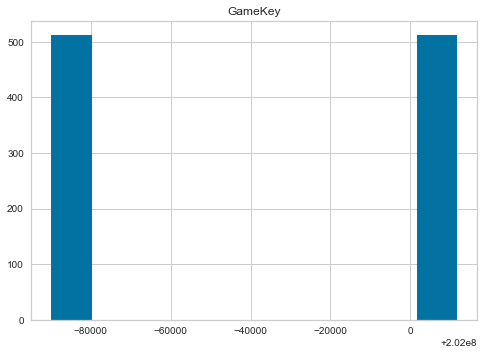

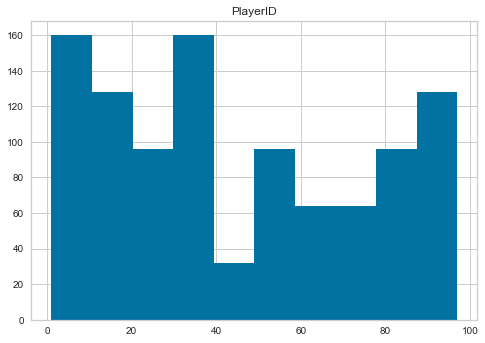

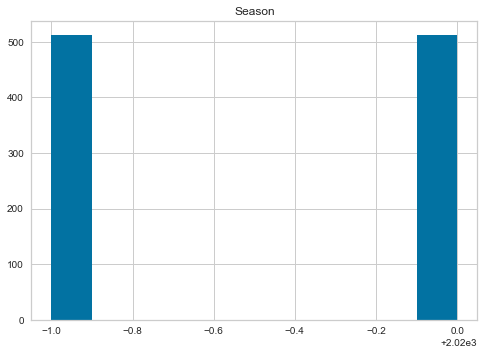

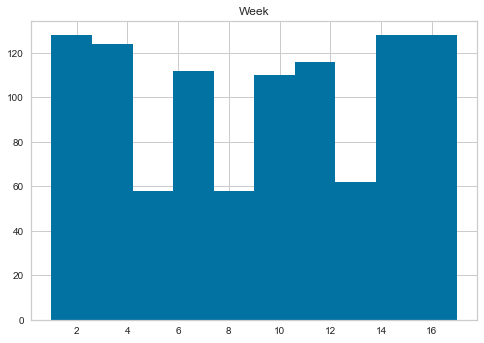

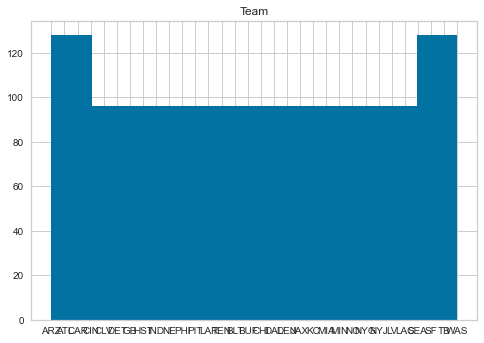

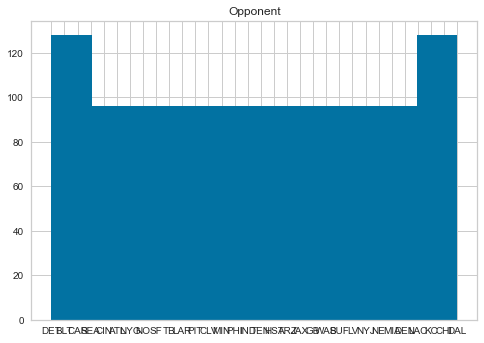

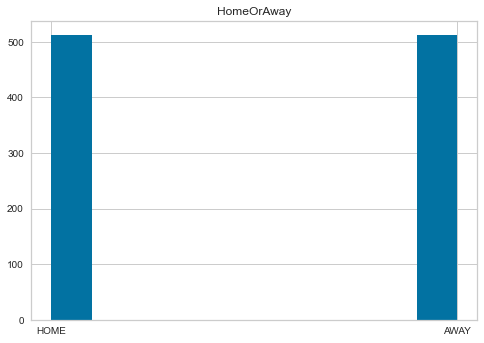

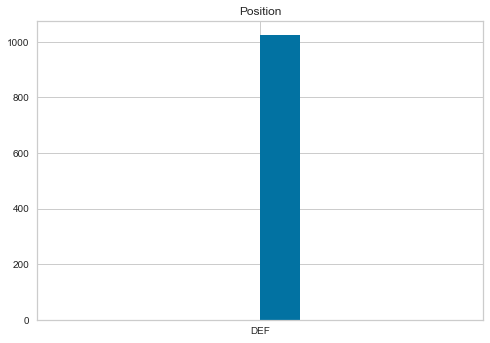

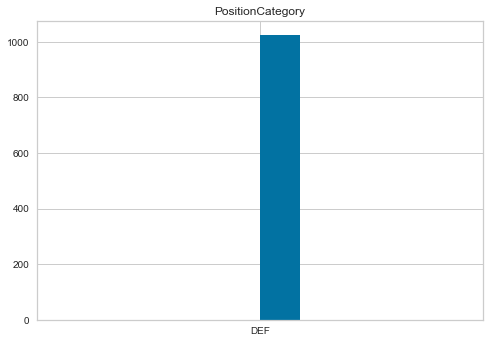

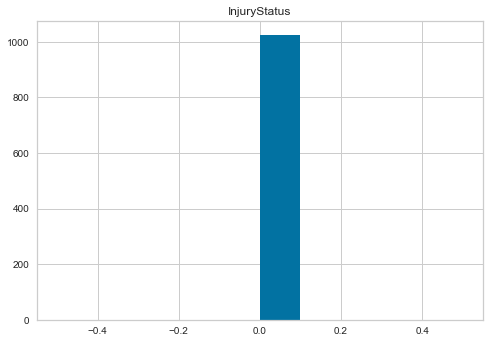

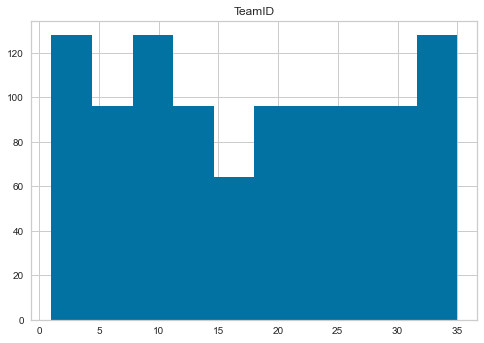

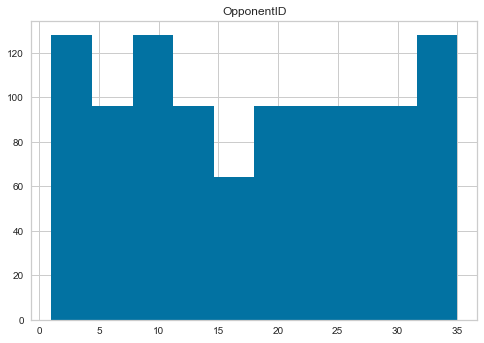

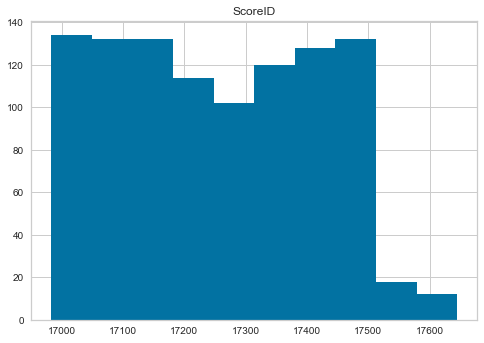

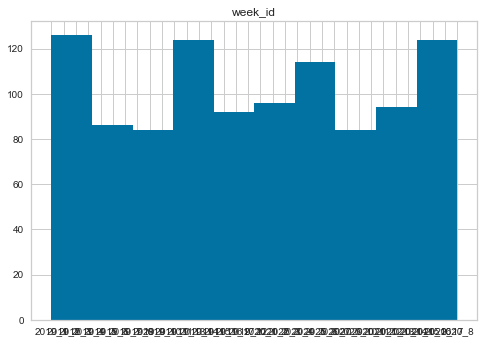

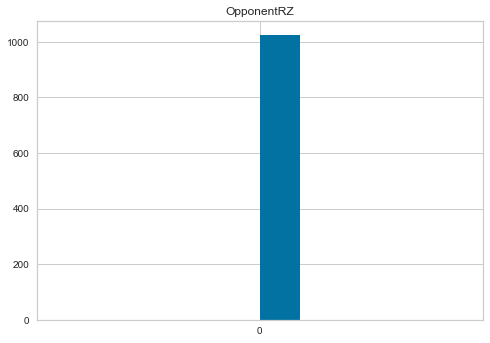

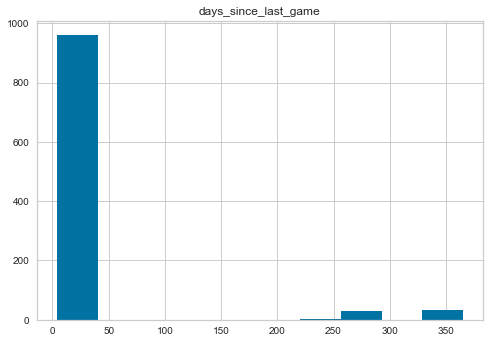

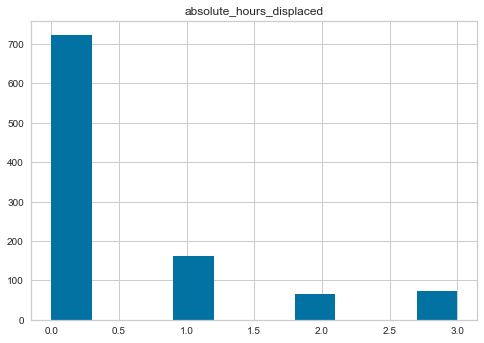

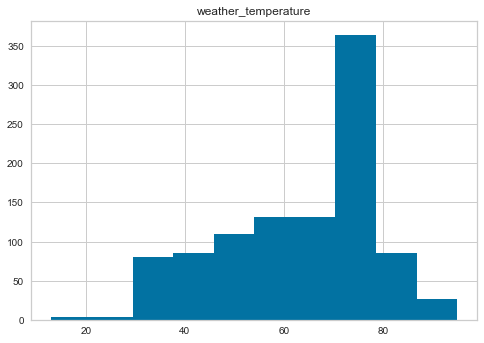

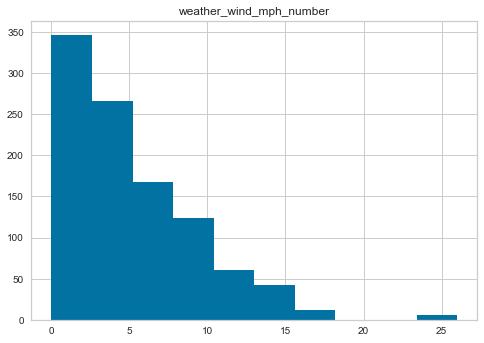

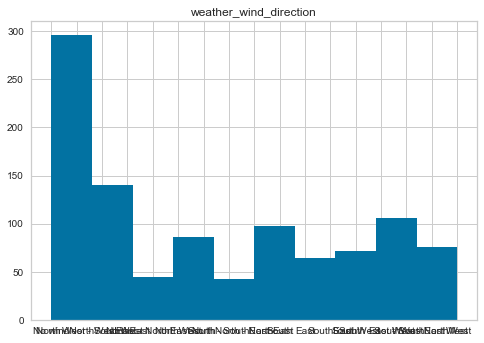

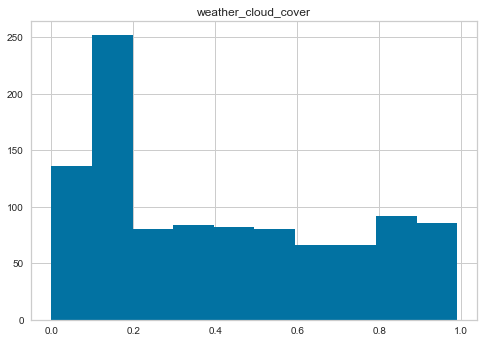

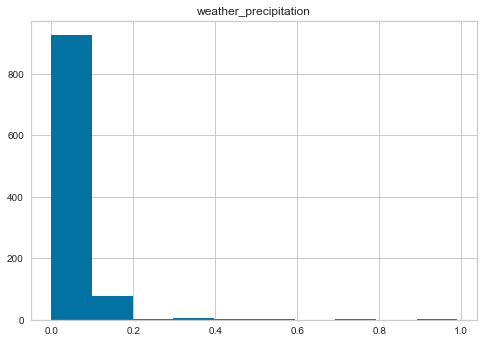

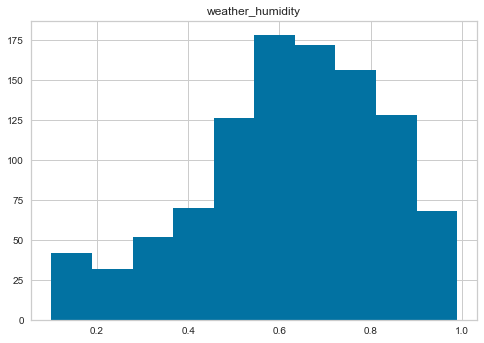

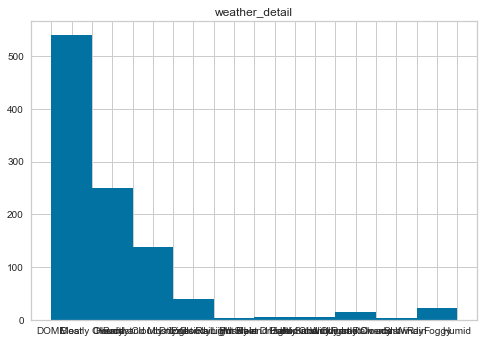

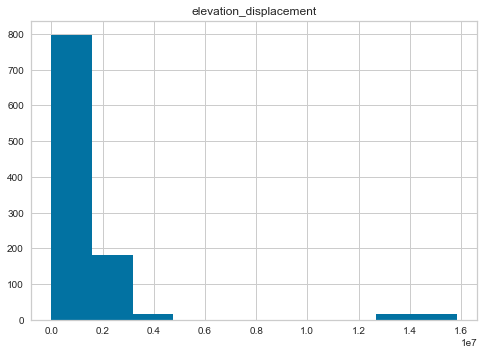

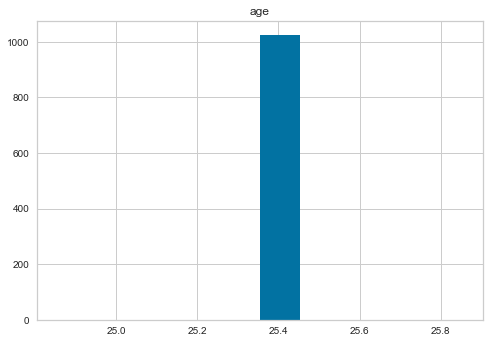

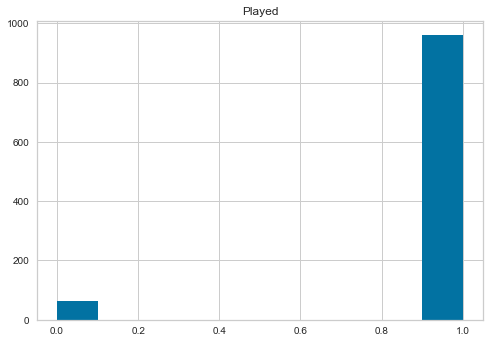

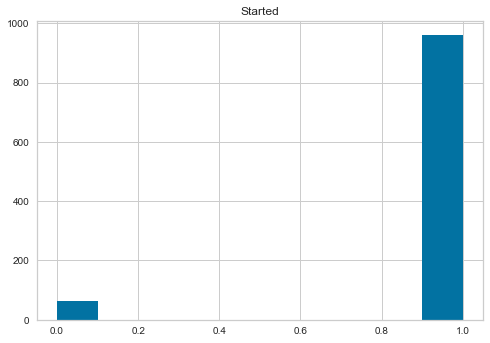

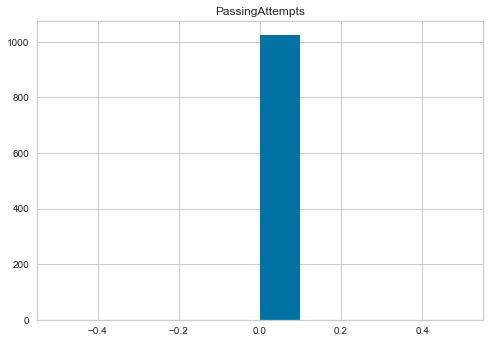

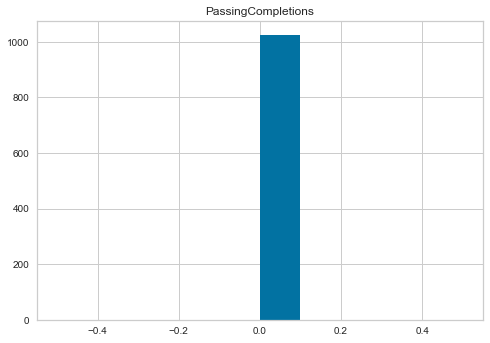

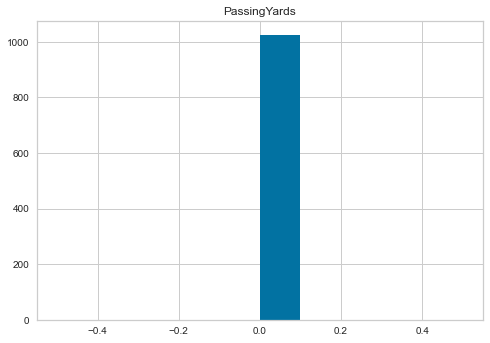

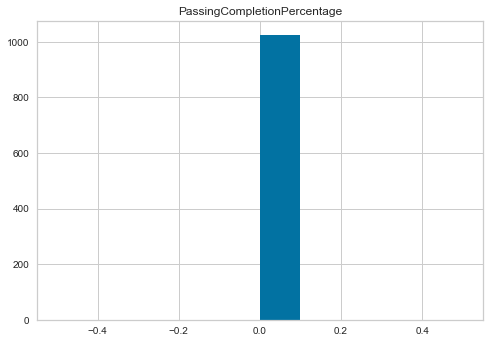

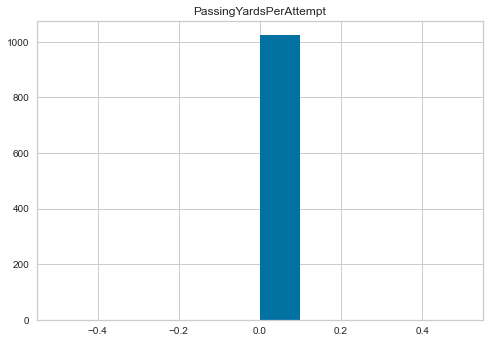

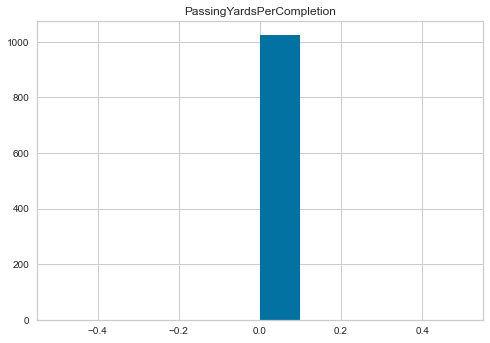

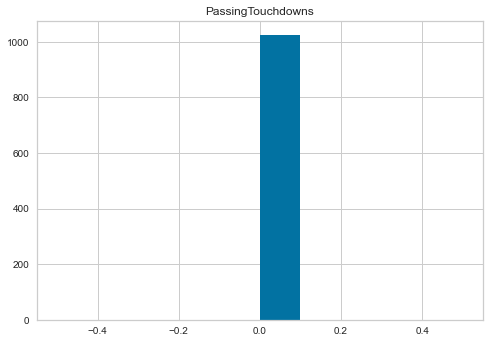

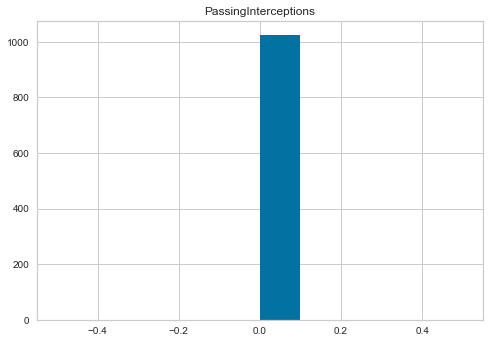

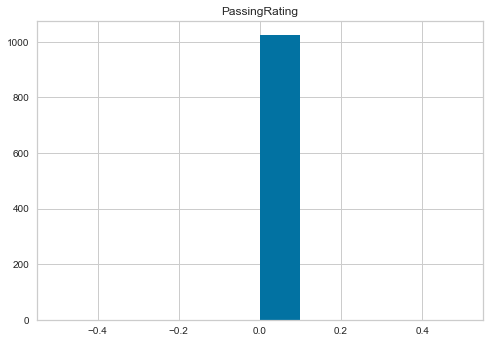

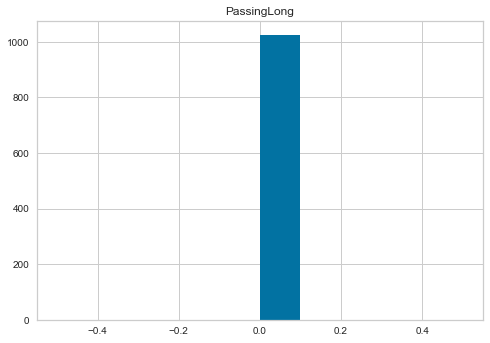

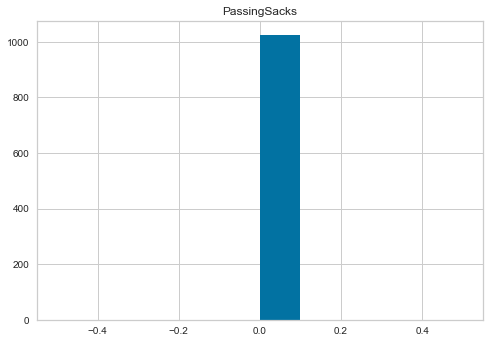

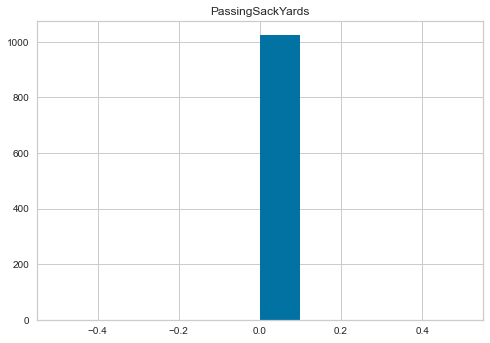

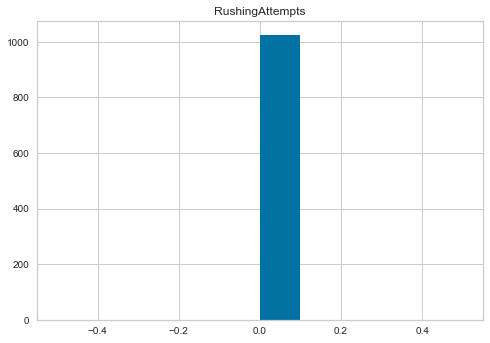

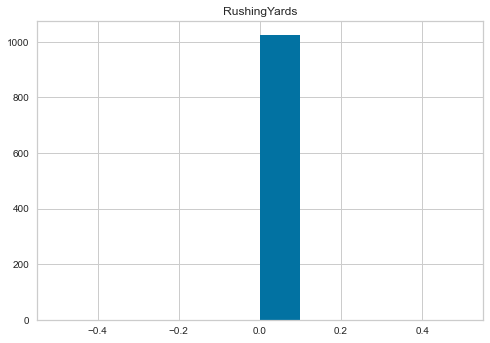

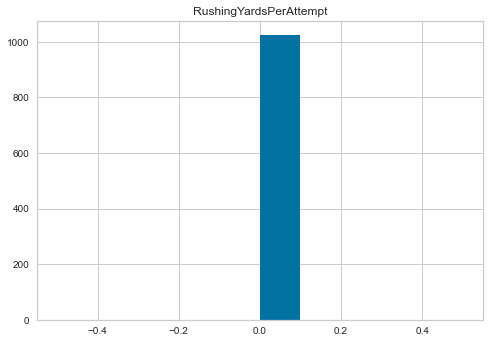

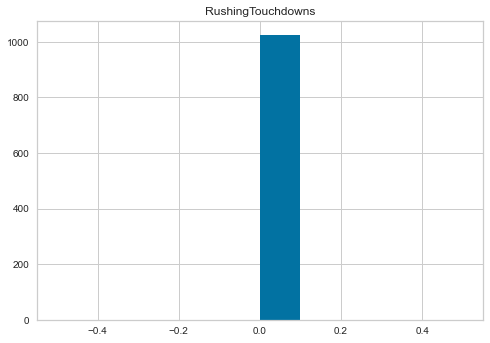

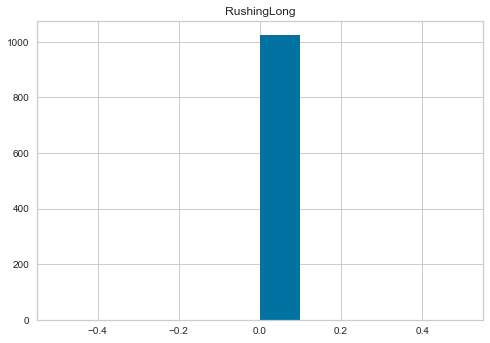

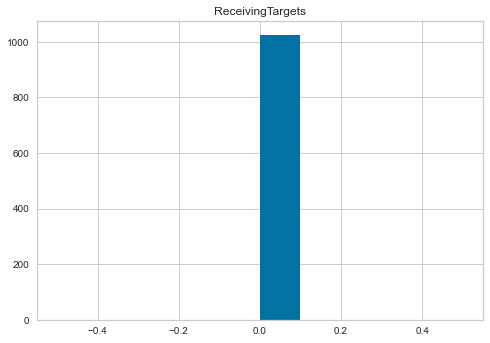

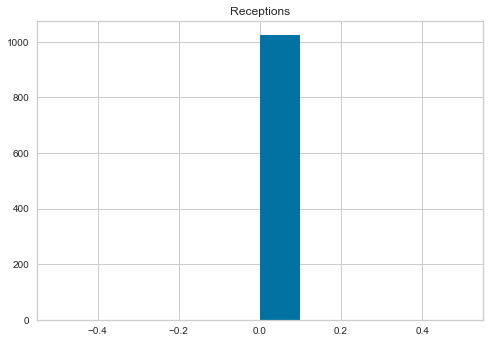

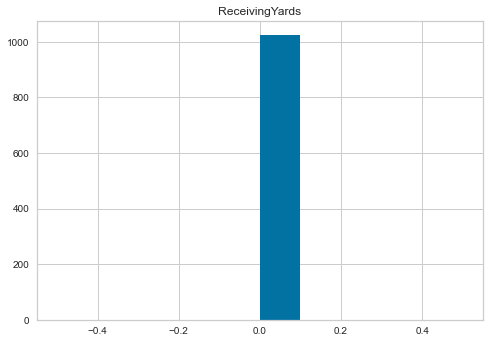

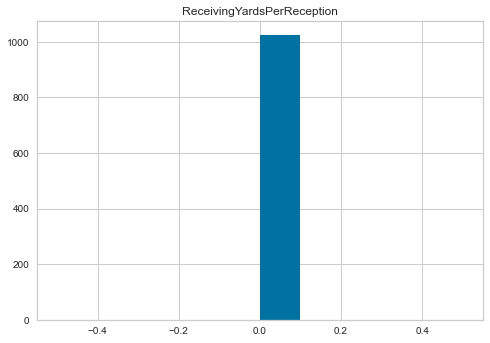

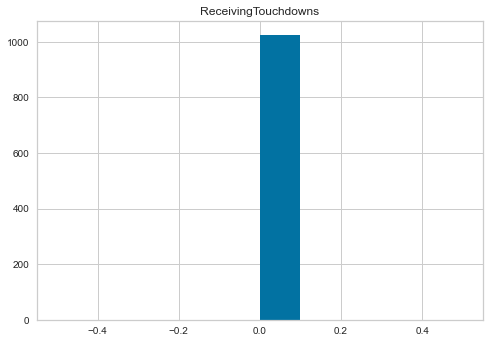

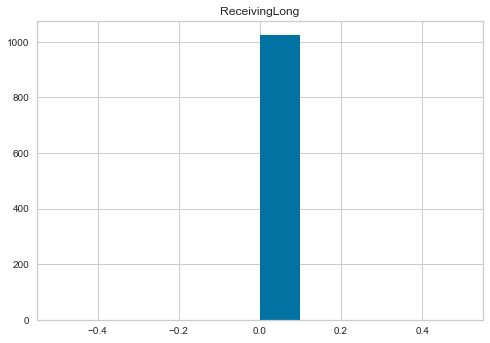

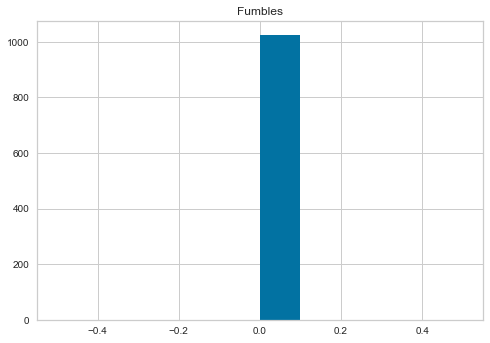

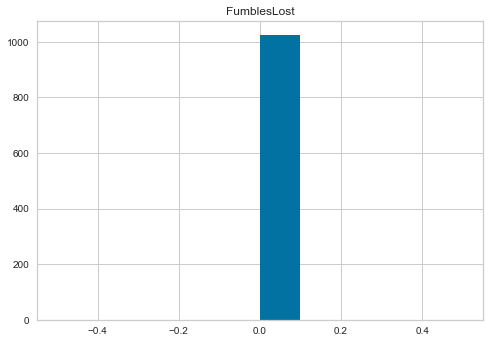

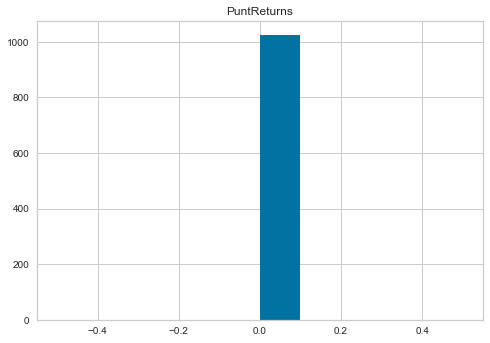

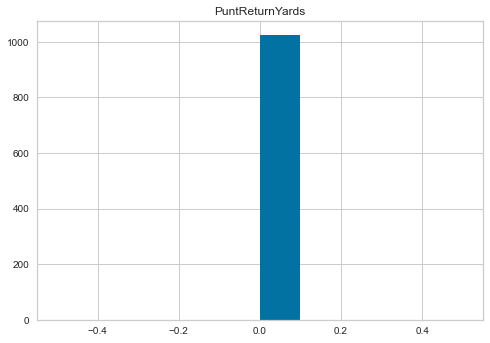

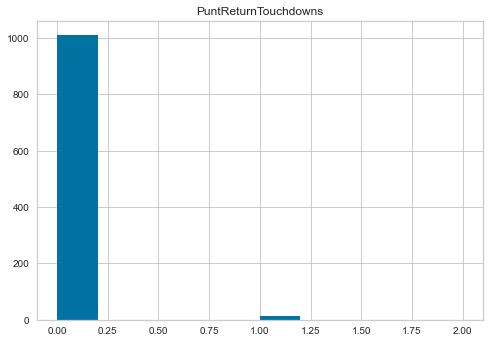

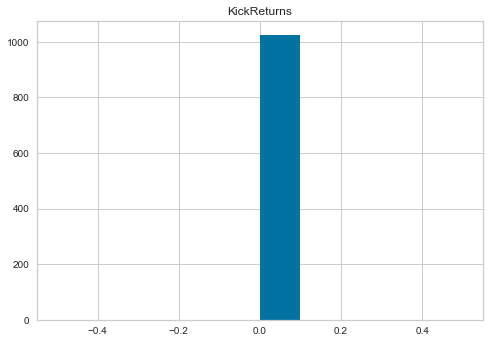

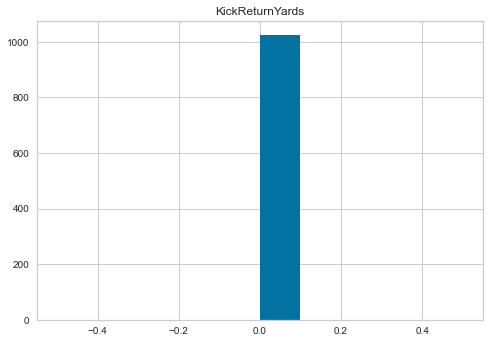

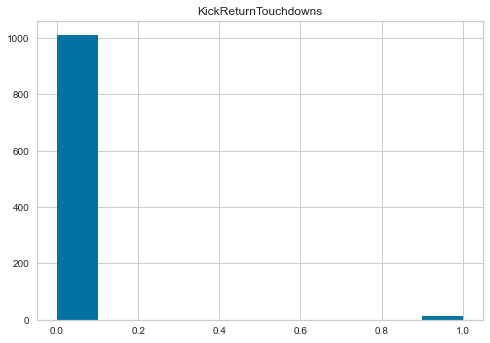

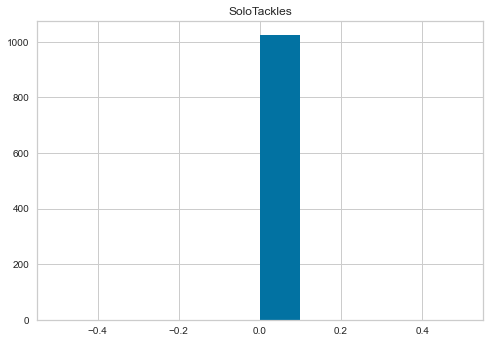

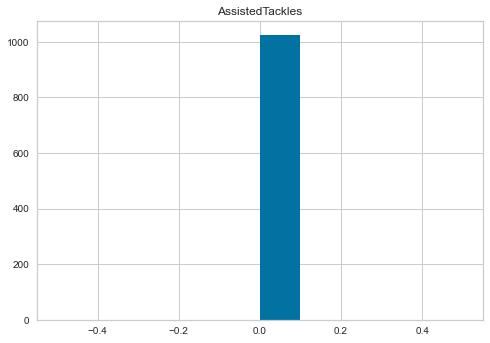

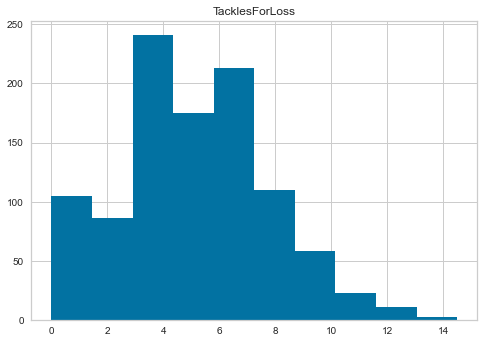

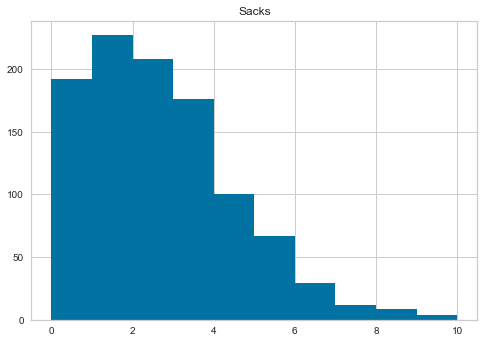

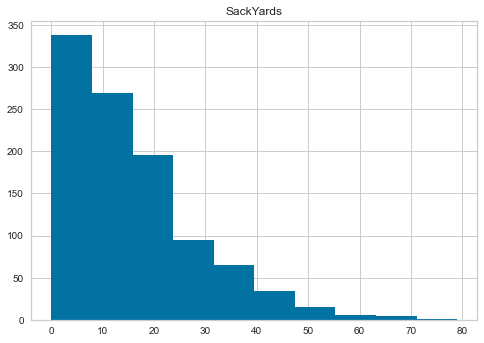

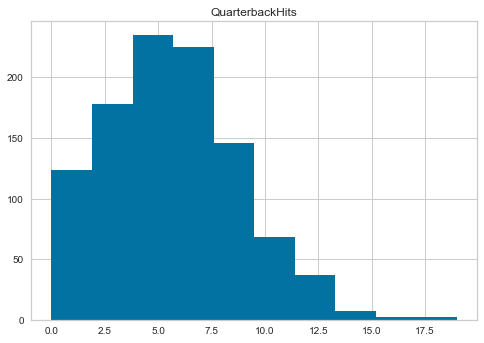

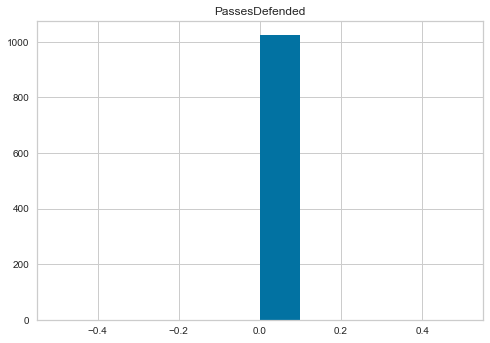

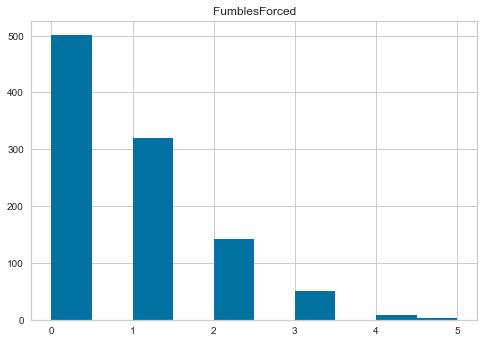

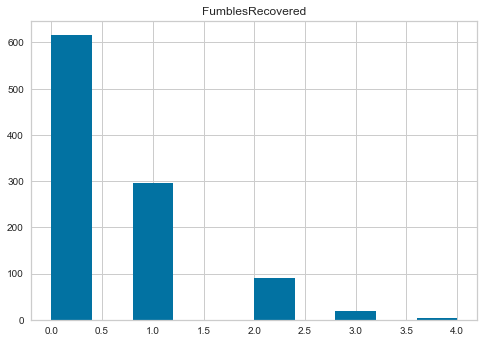

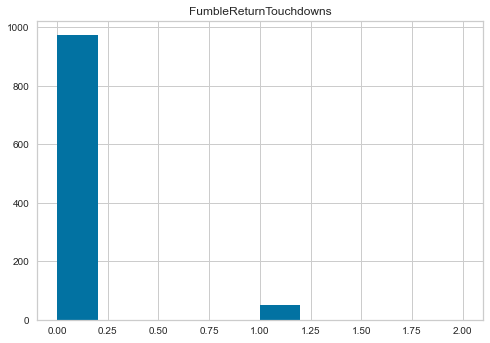

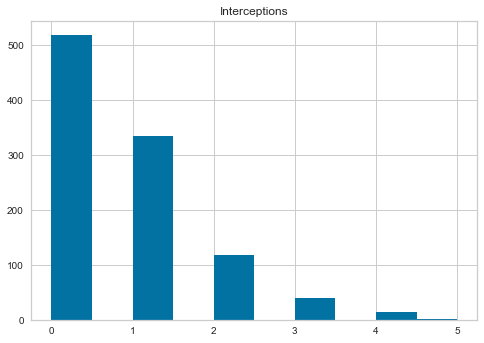

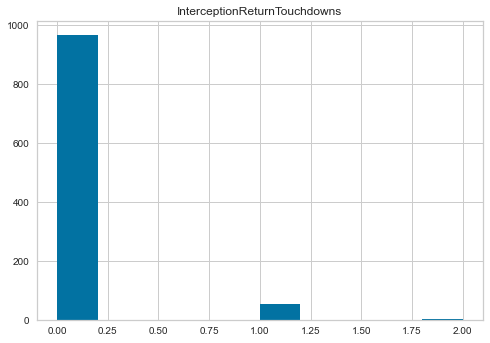

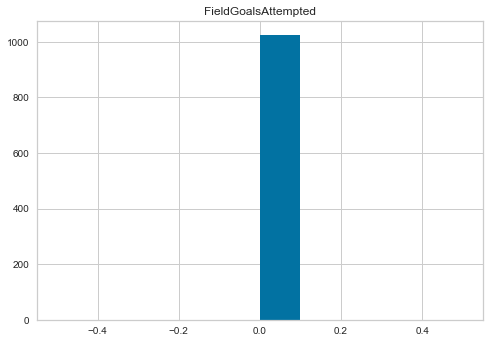

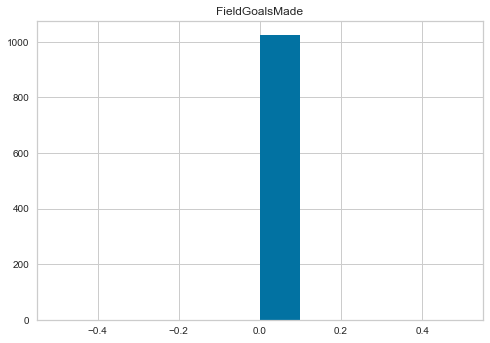

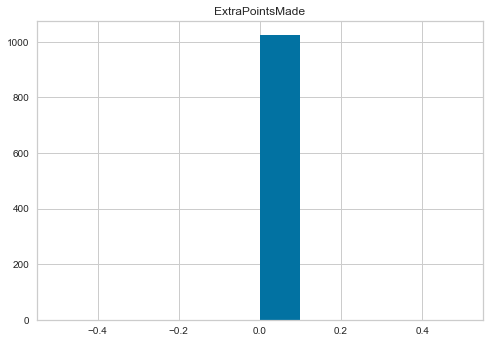

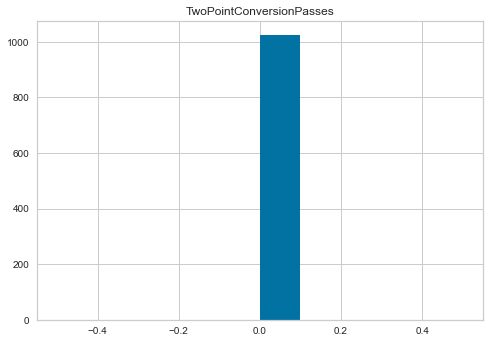

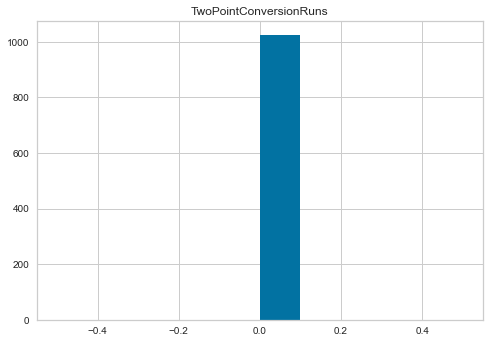

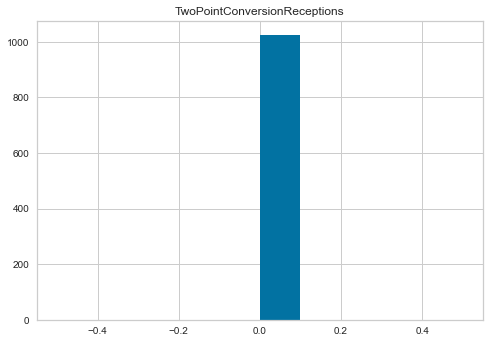

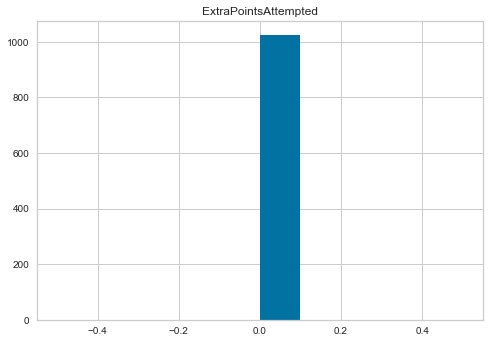

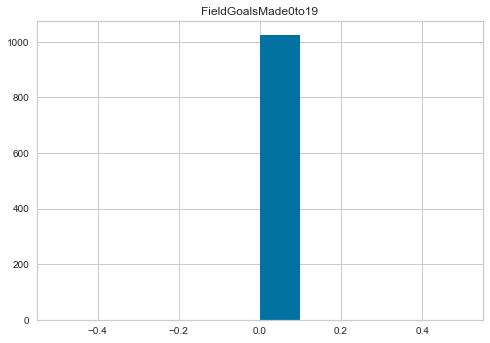

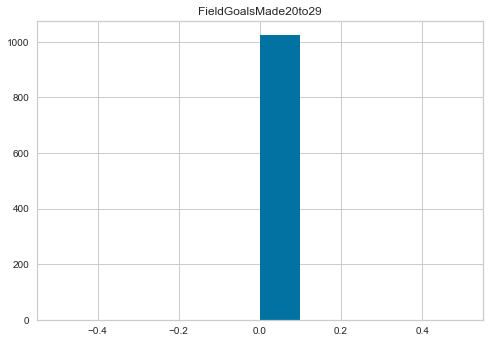

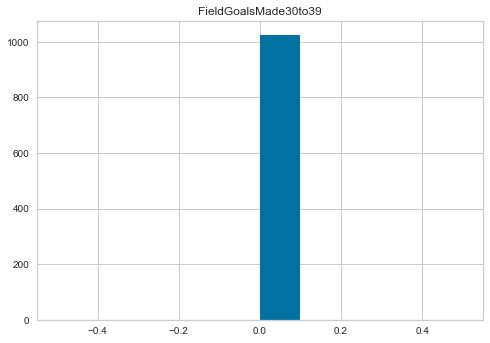

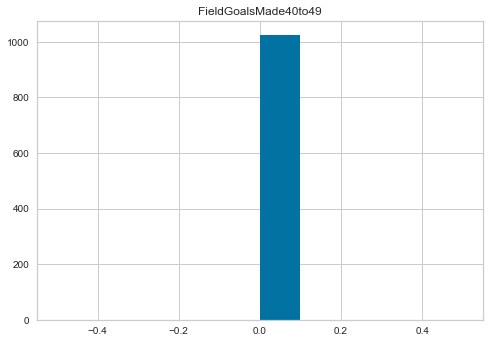

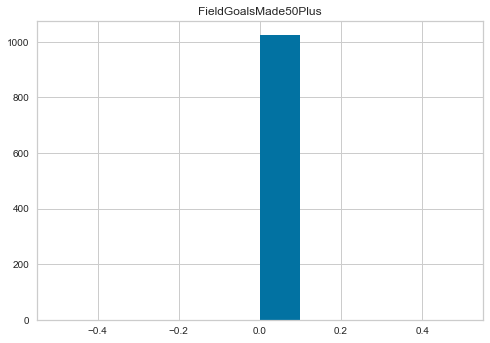

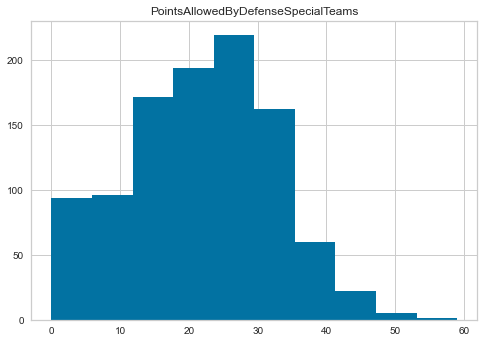

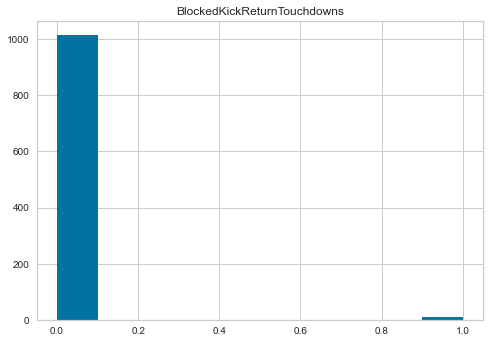

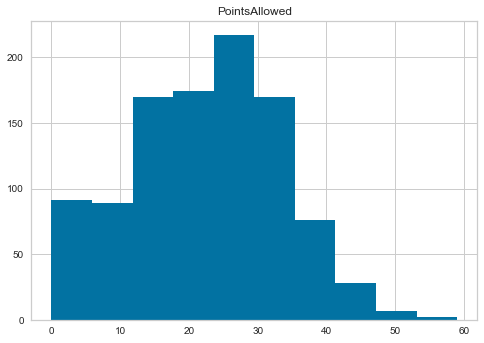

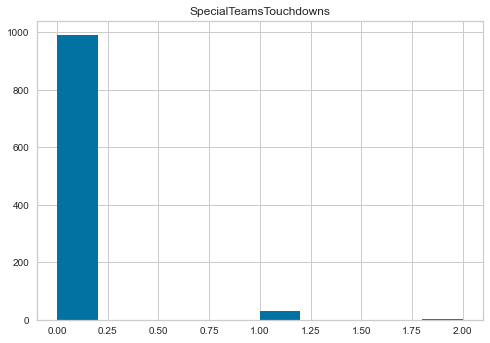

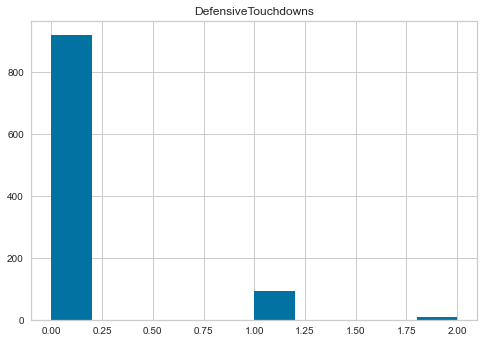

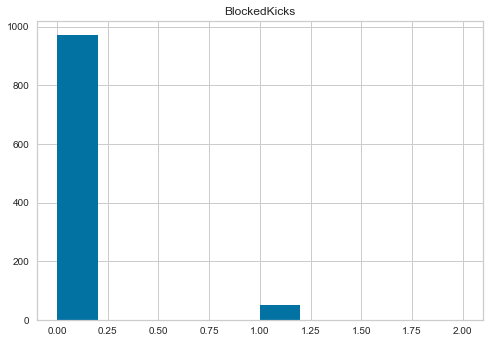

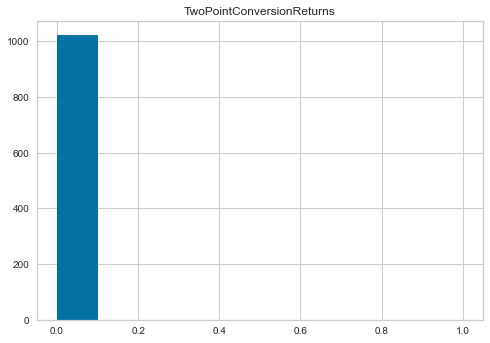

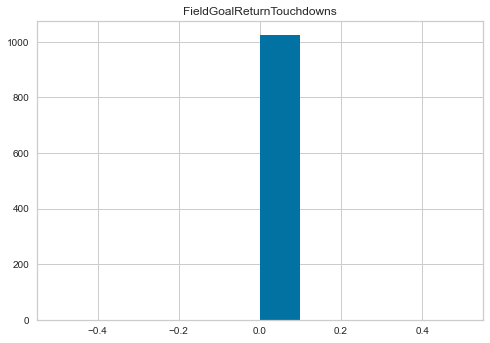

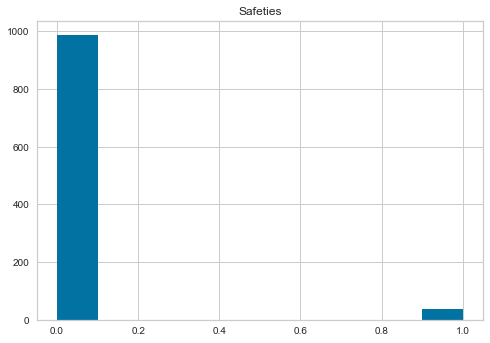

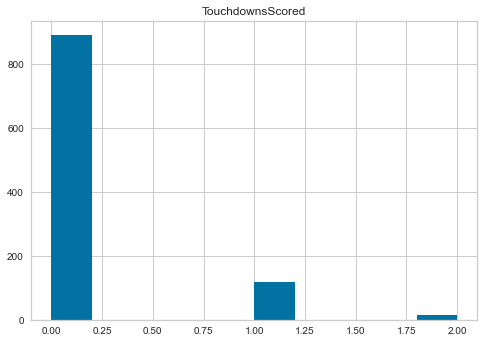

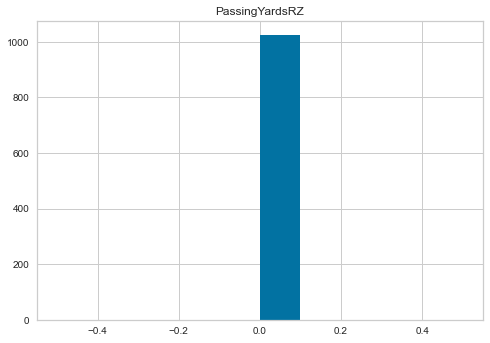

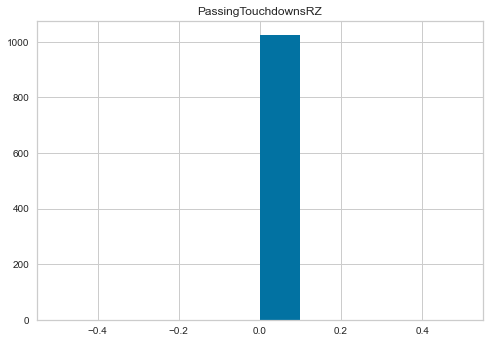

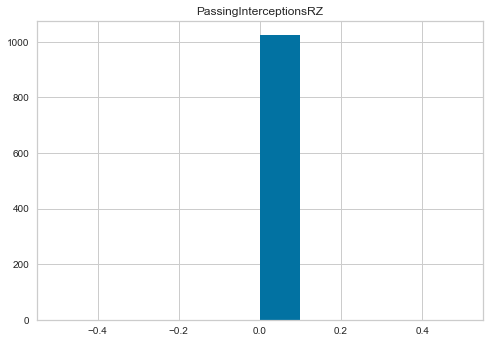

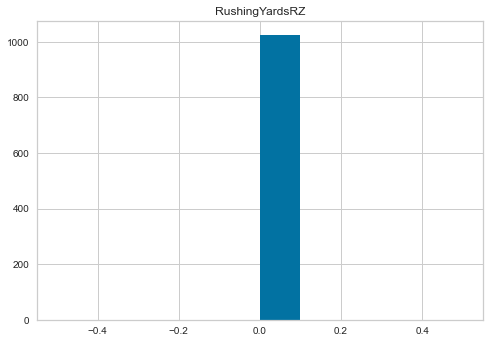

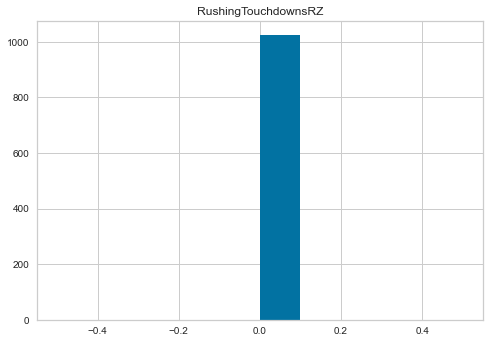

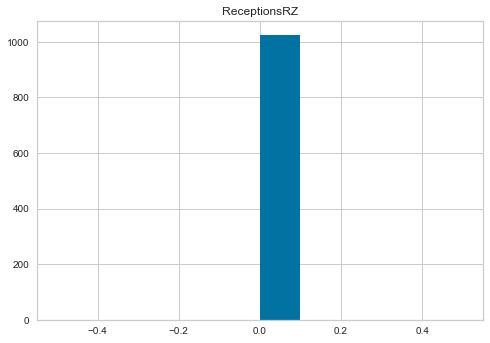

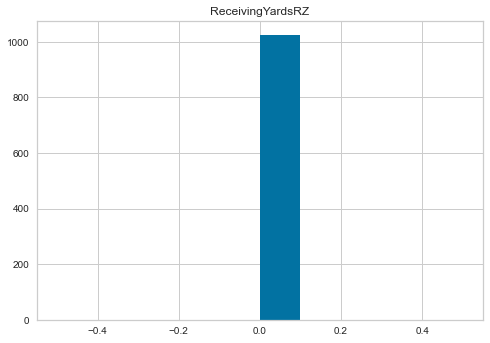

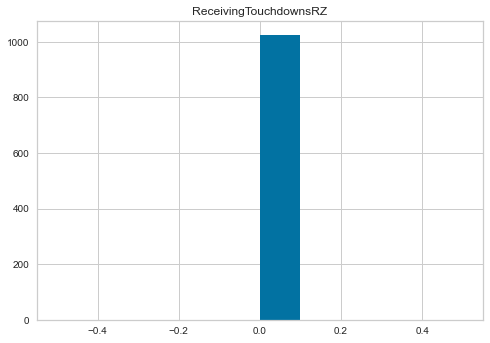

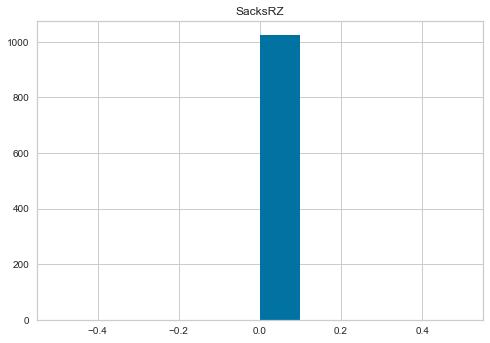

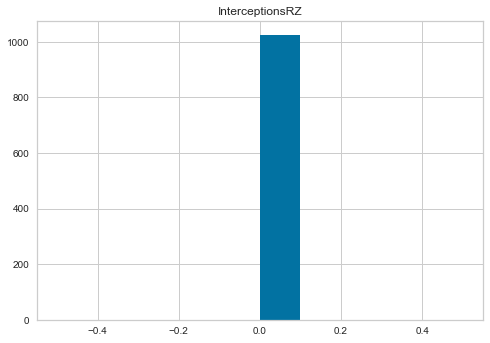

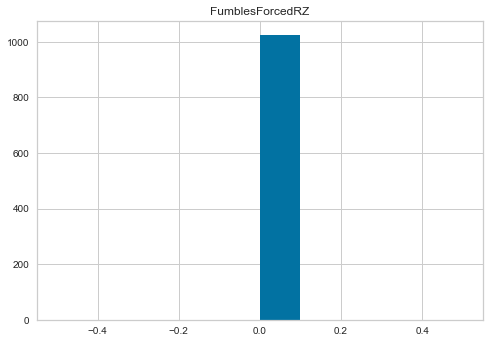

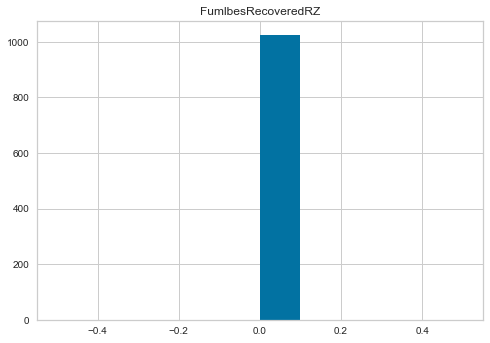

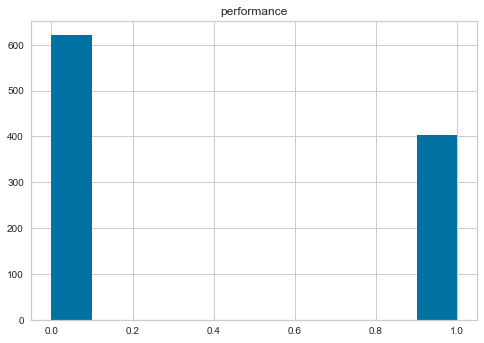

In [638]:
for col in boxplot_cols:
    
    df[col].hist()
    plt.title(col)
    plt.show()
    
    plt.close()

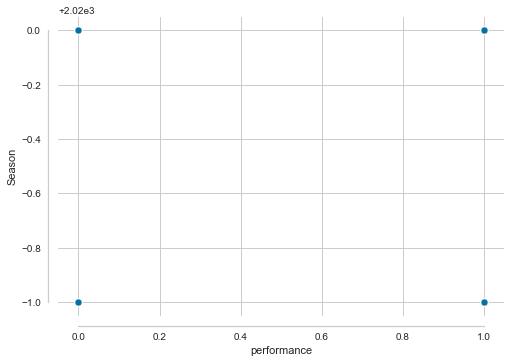

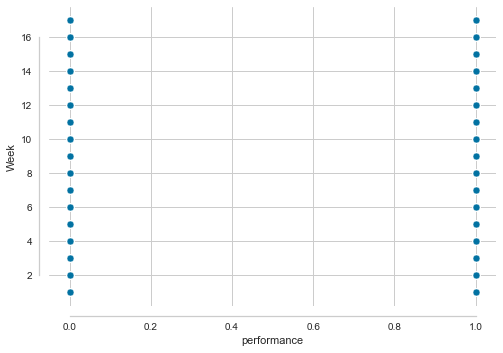

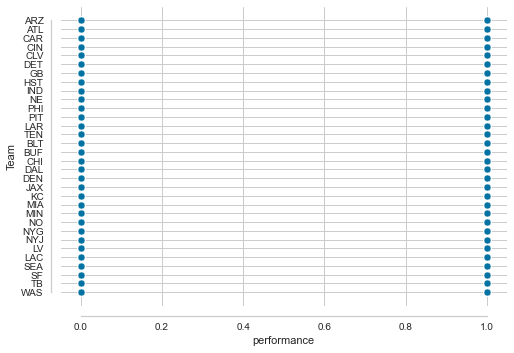

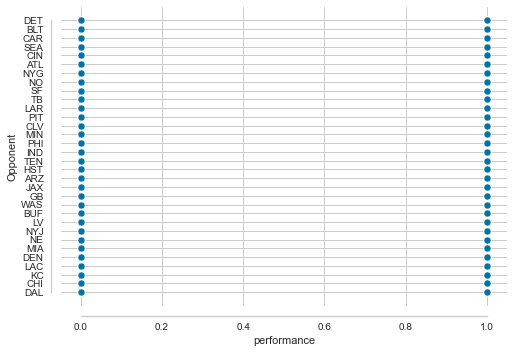

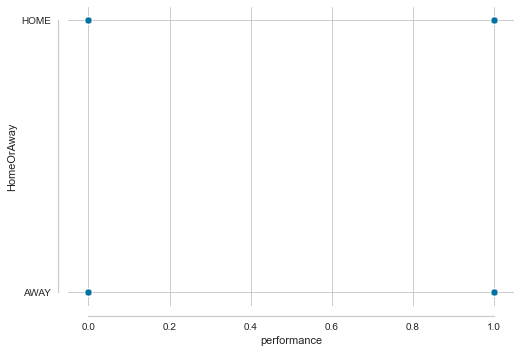

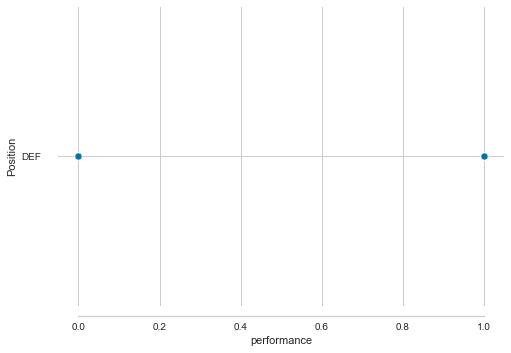

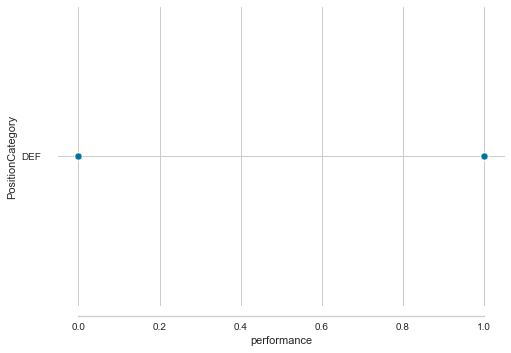

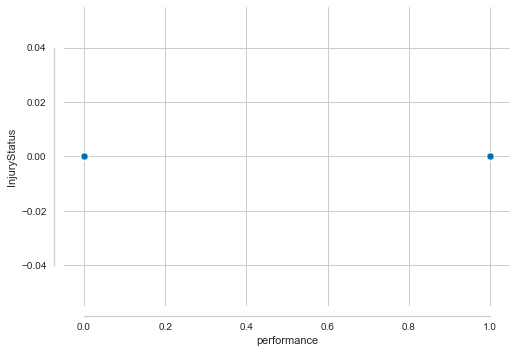

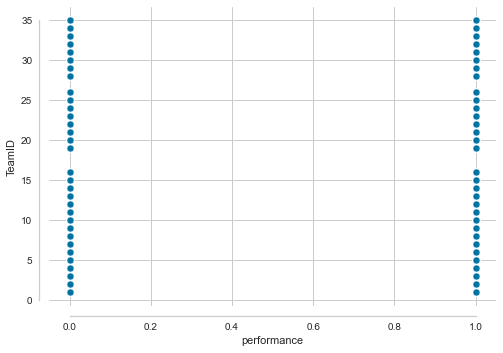

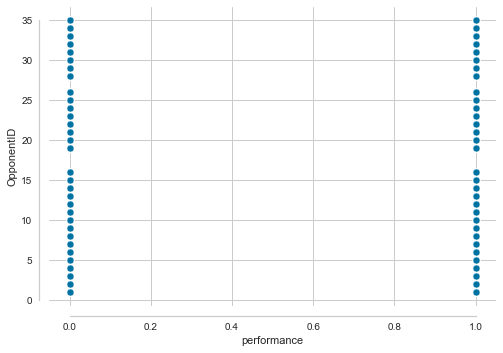

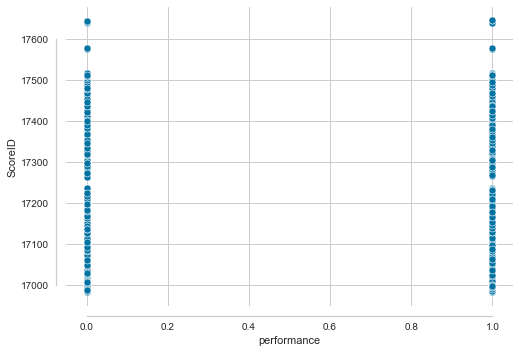

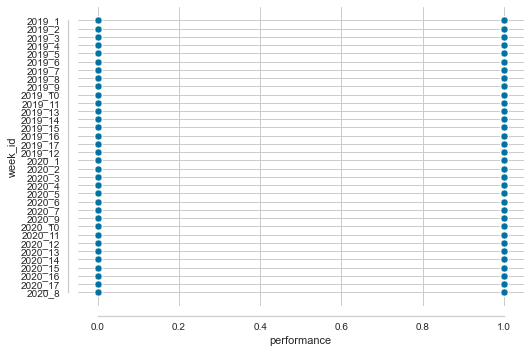

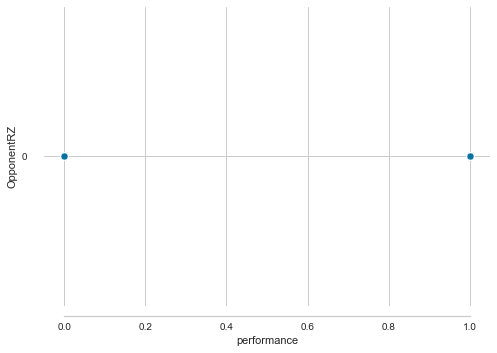

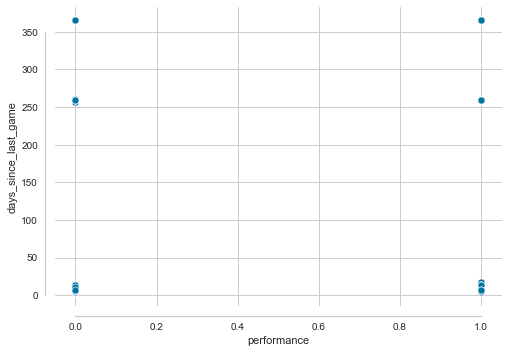

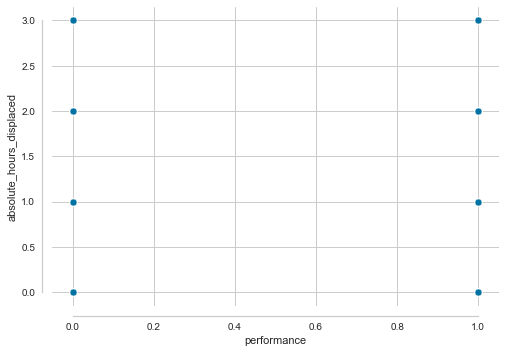

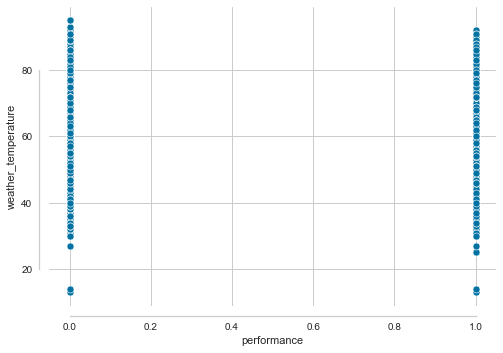

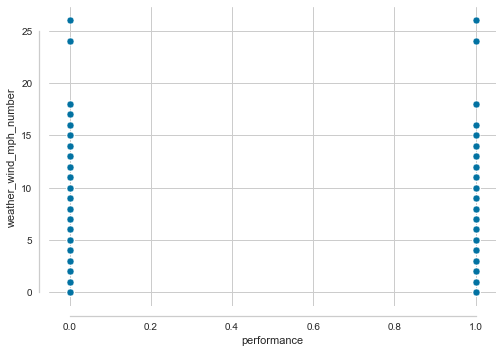

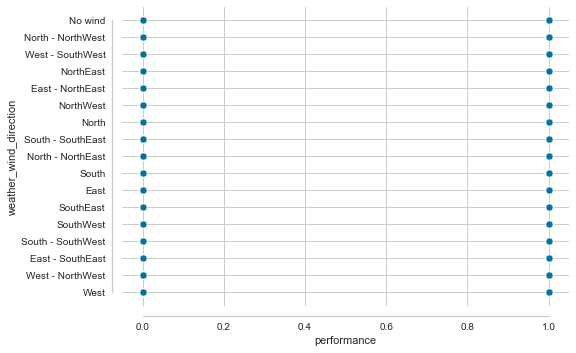

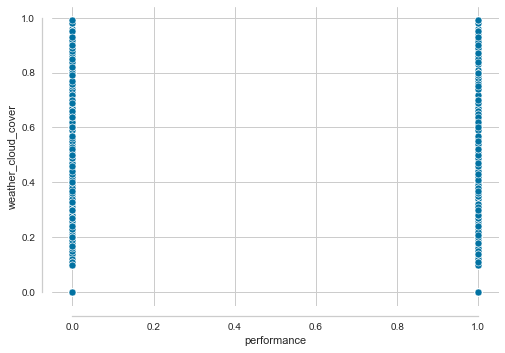

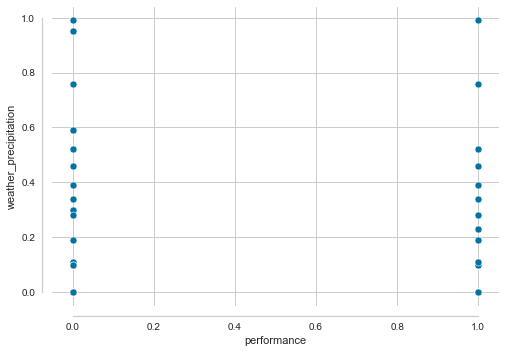

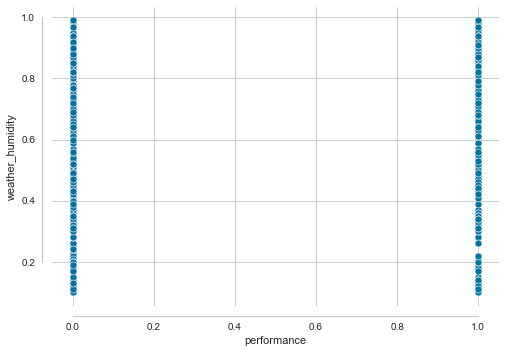

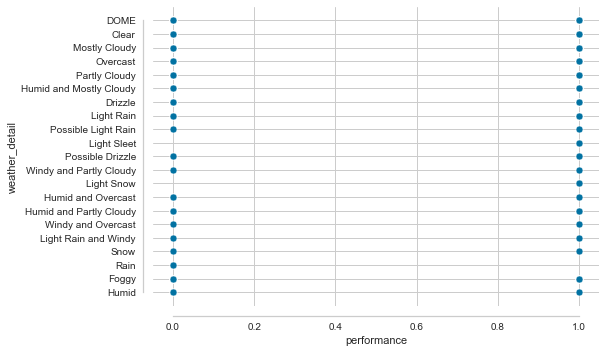

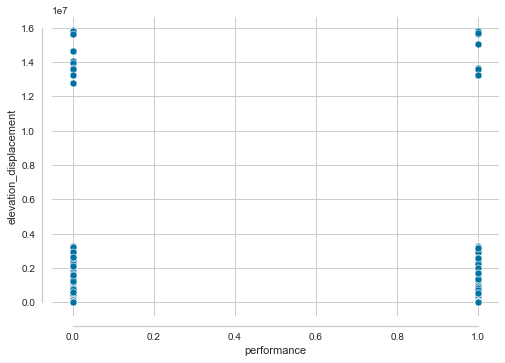

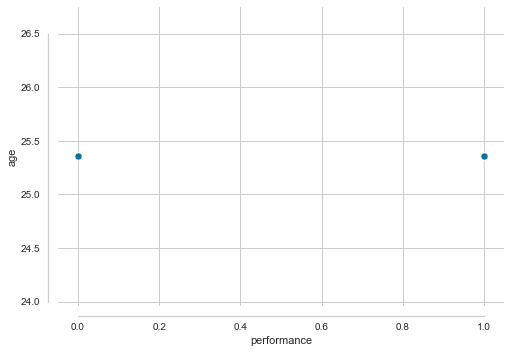

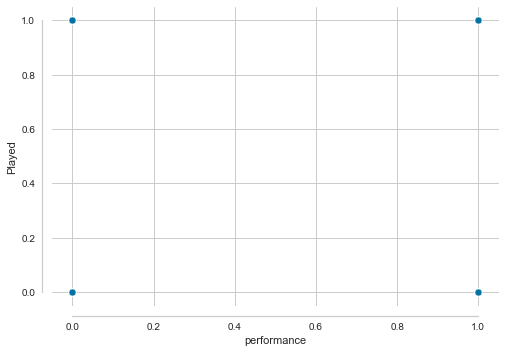

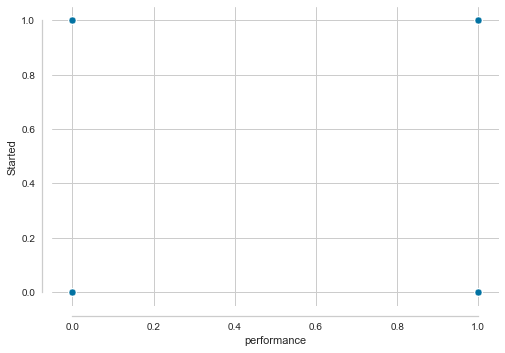

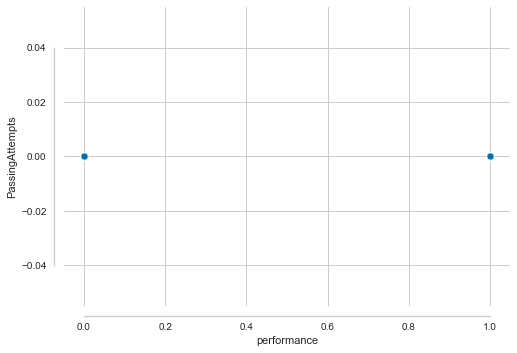

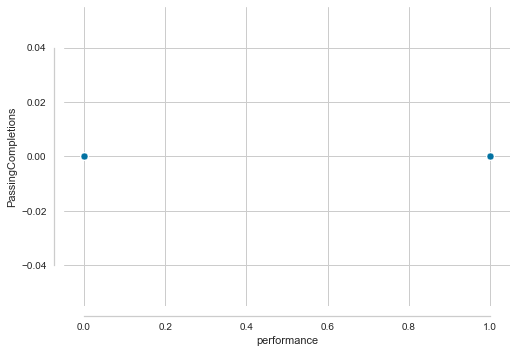

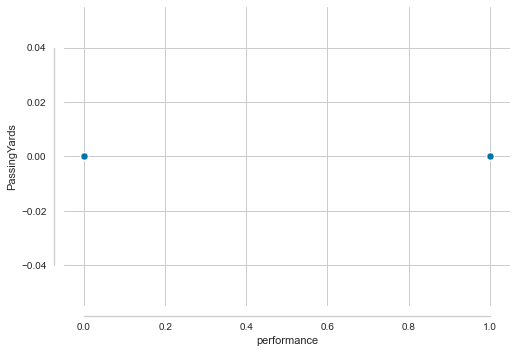

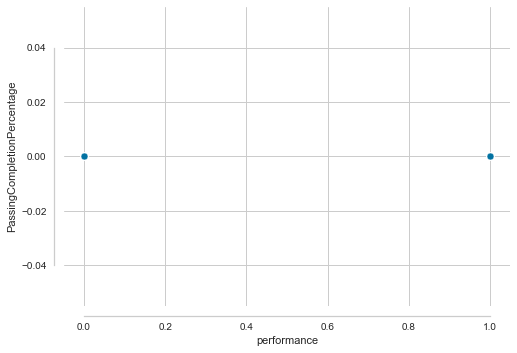

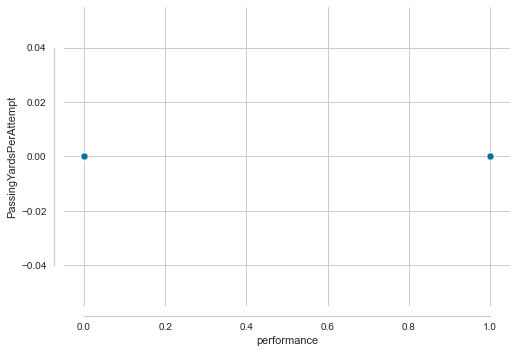

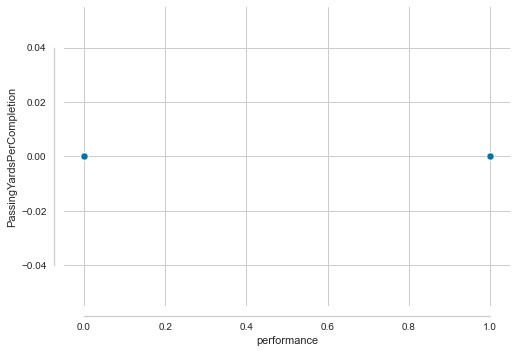

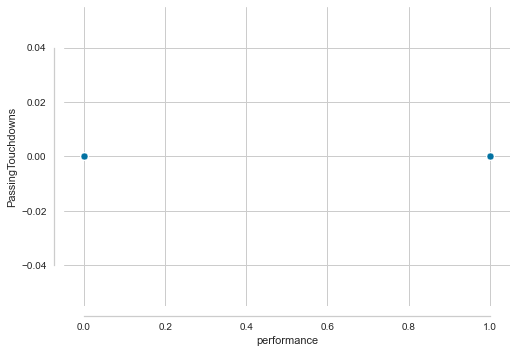

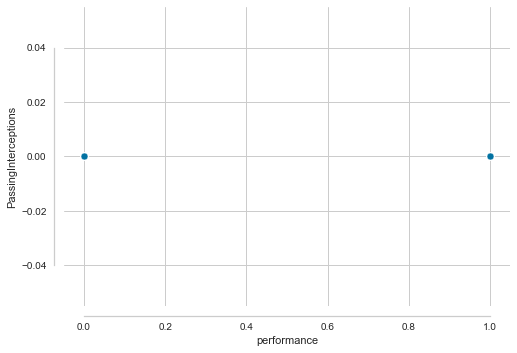

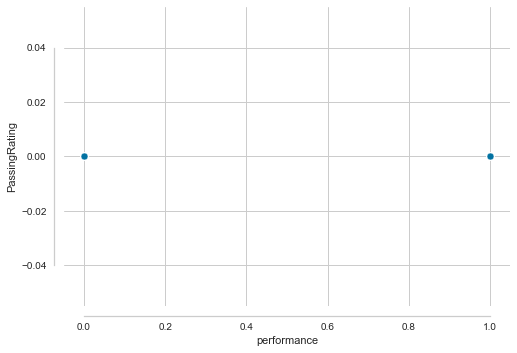

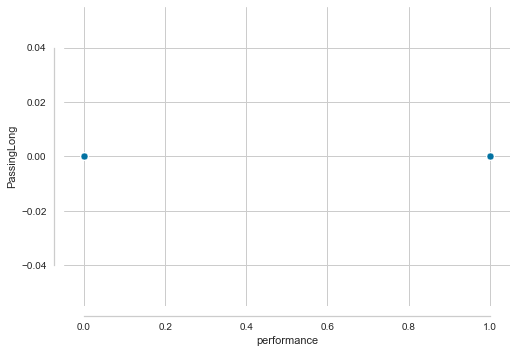

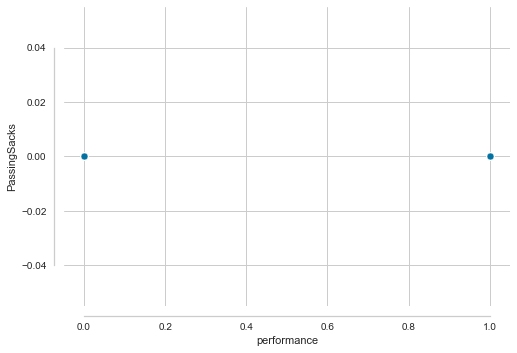

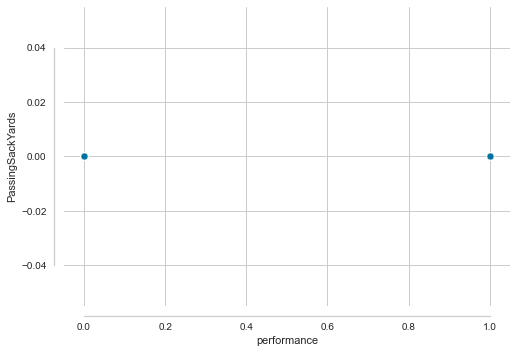

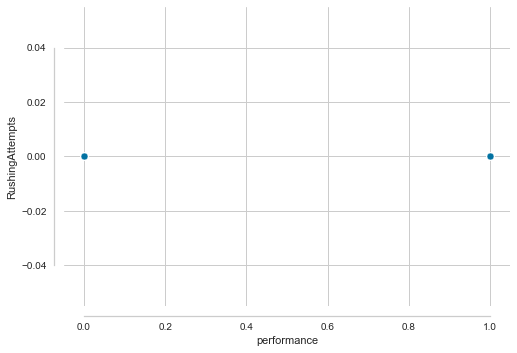

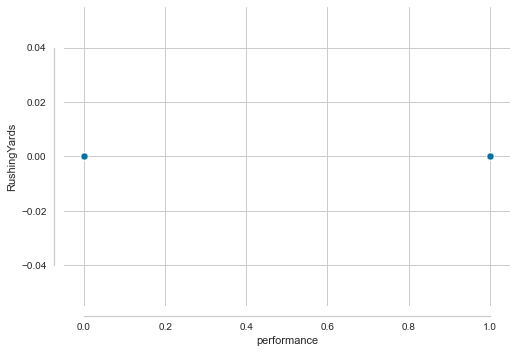

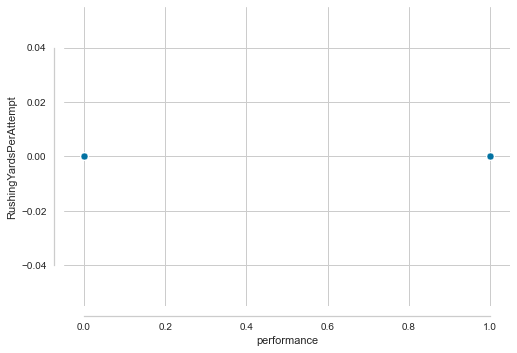

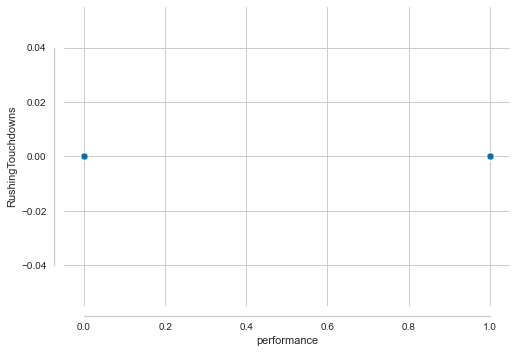

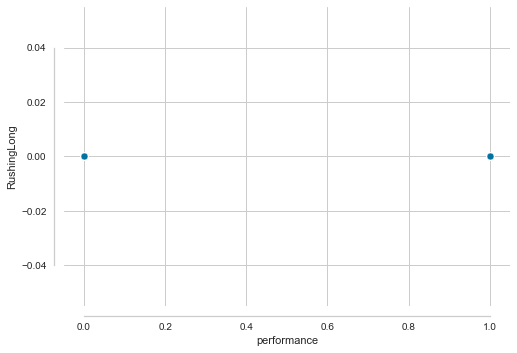

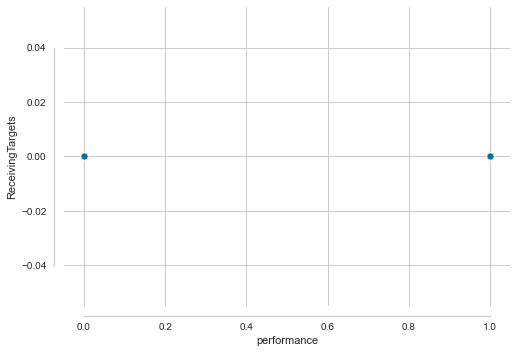

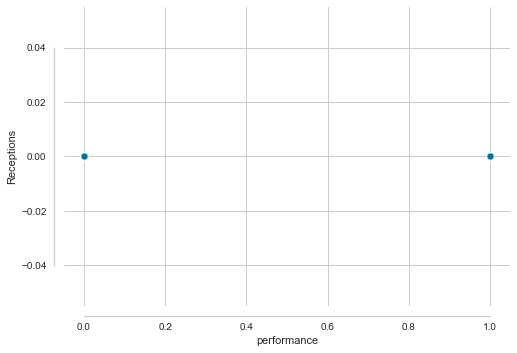

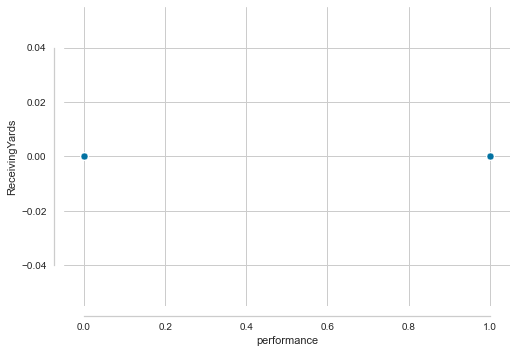

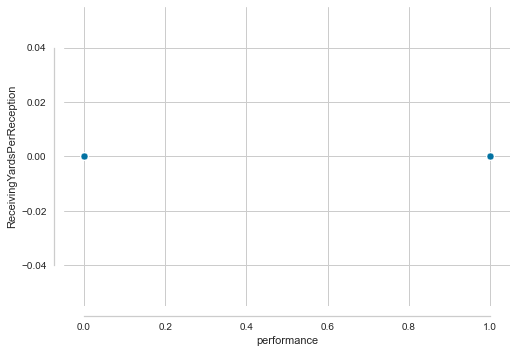

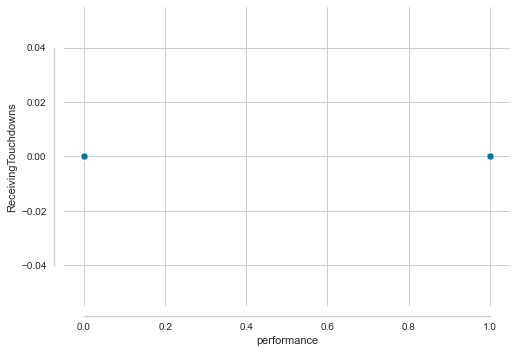

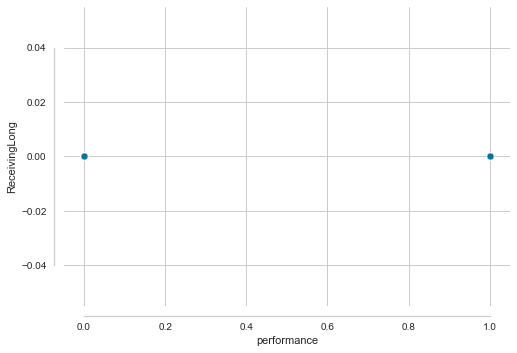

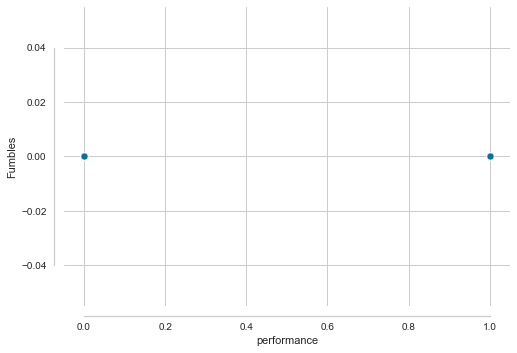

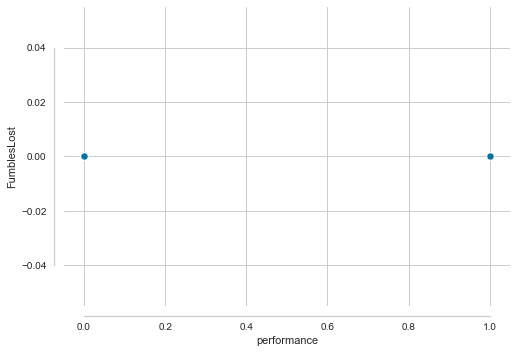

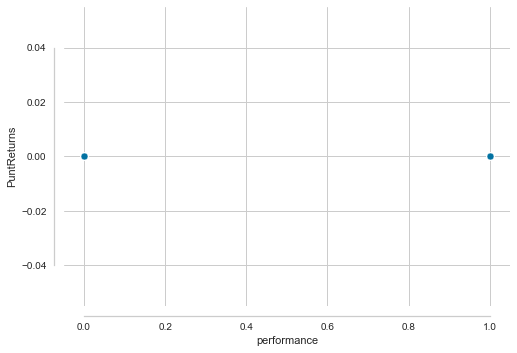

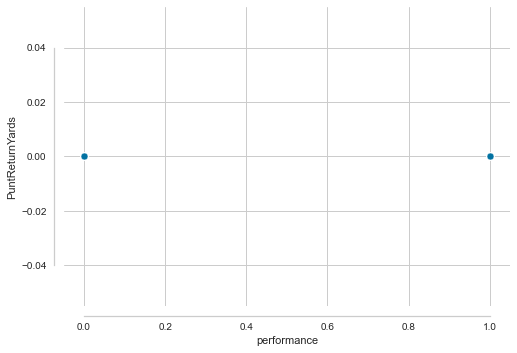

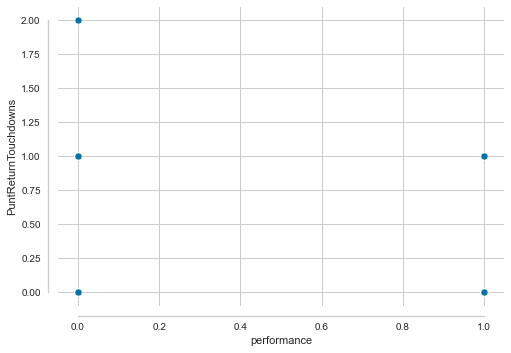

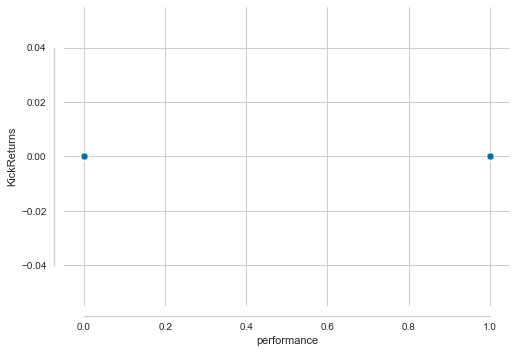

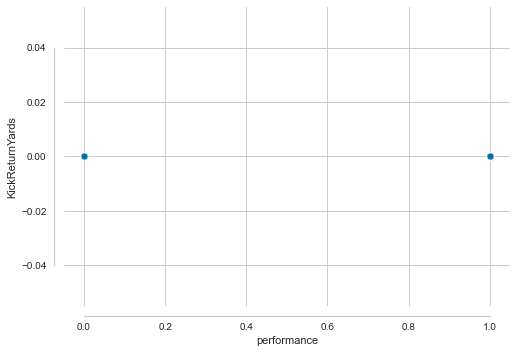

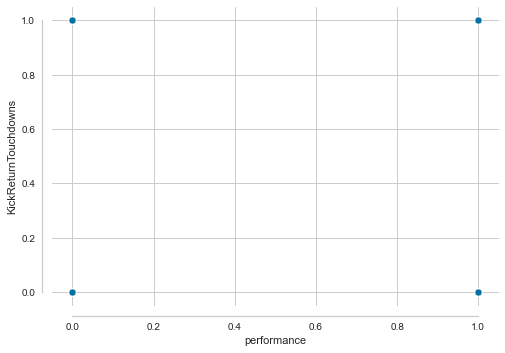

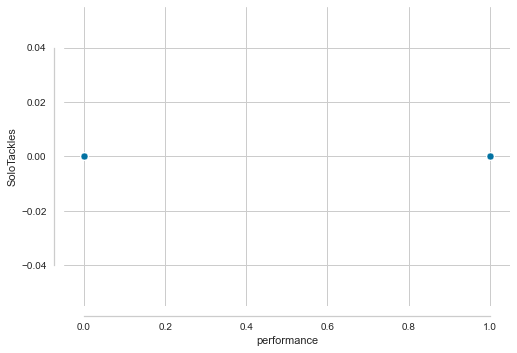

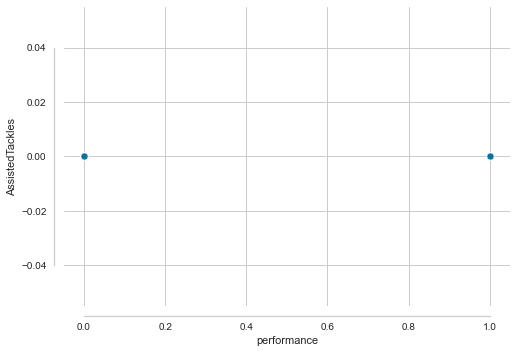

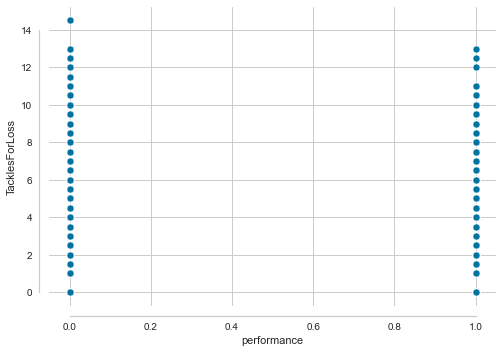

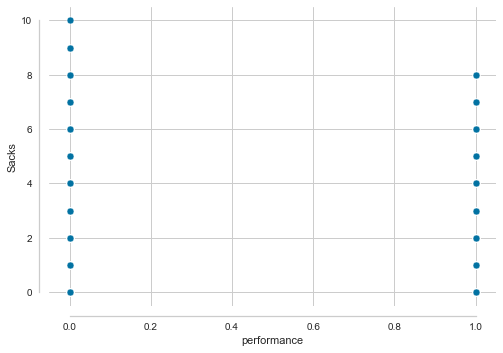

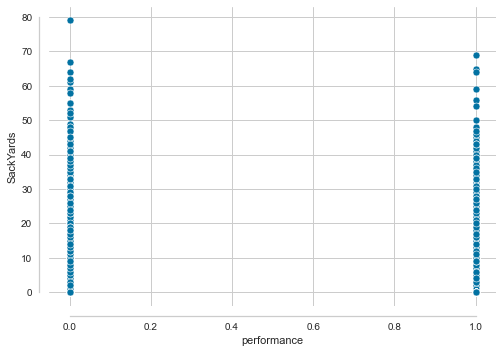

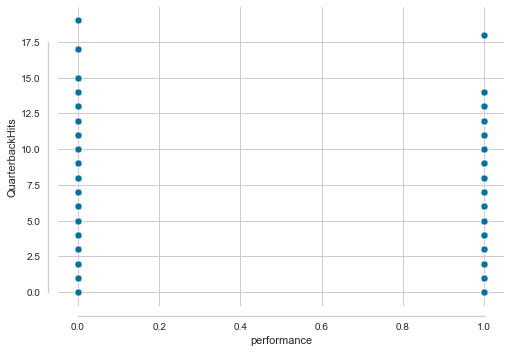

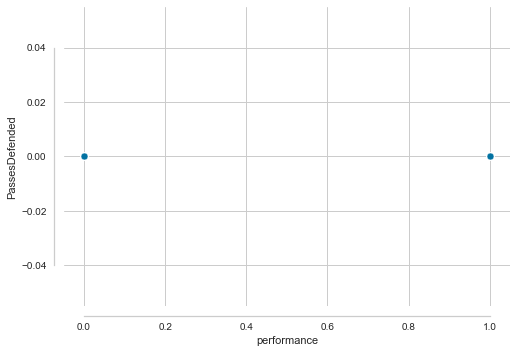

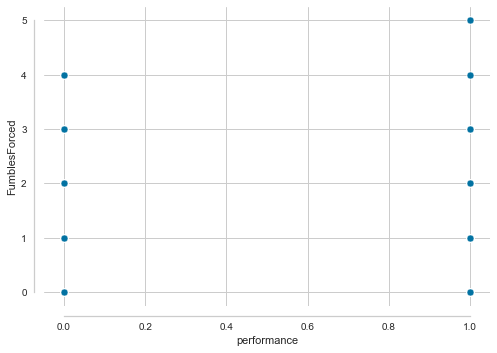

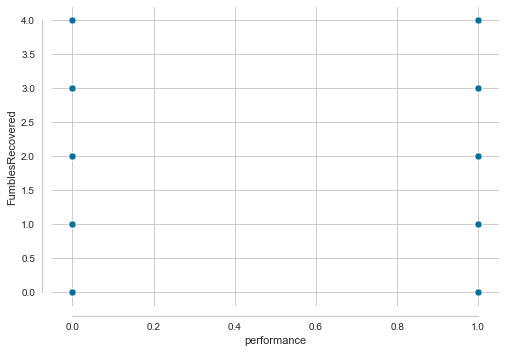

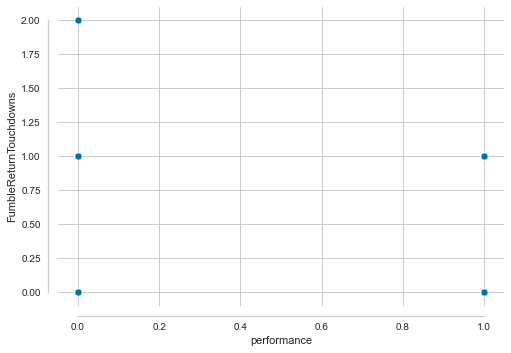

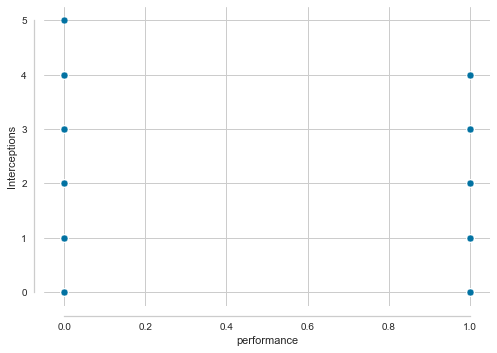

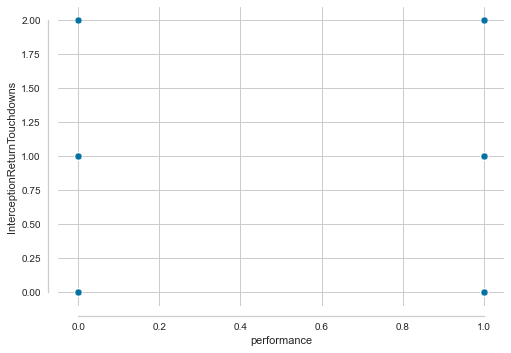

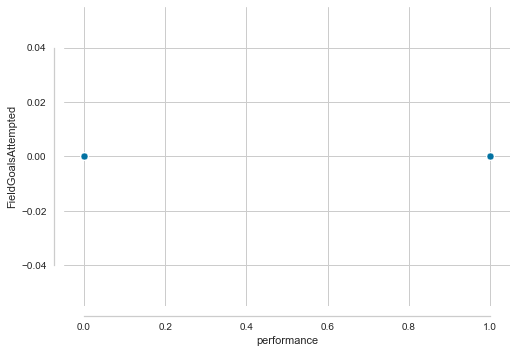

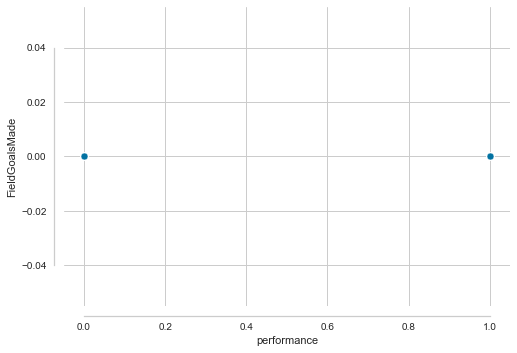

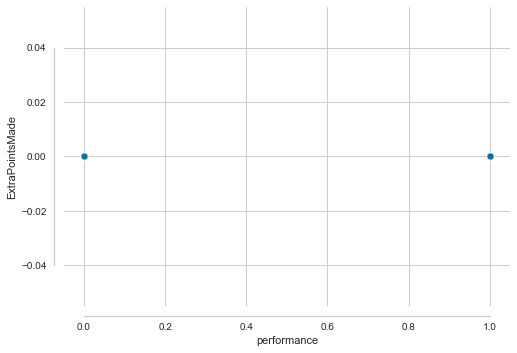

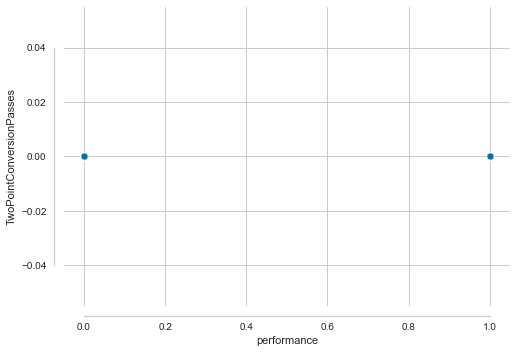

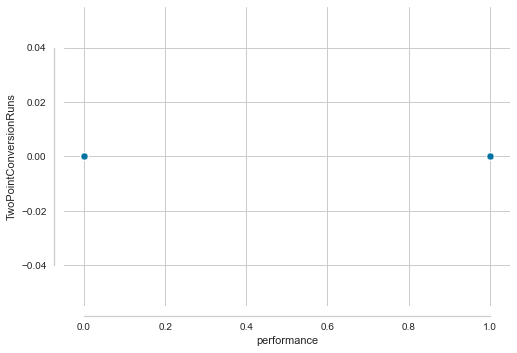

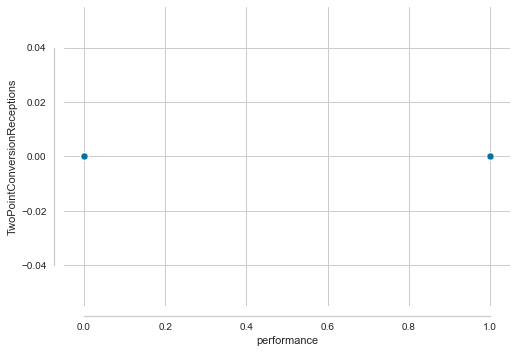

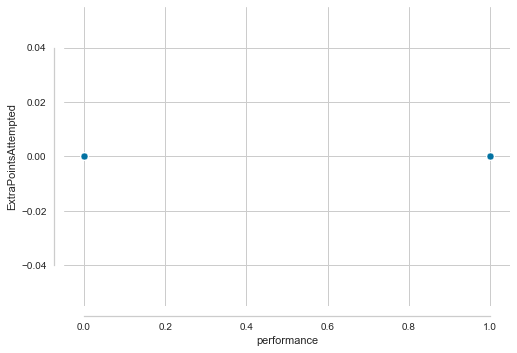

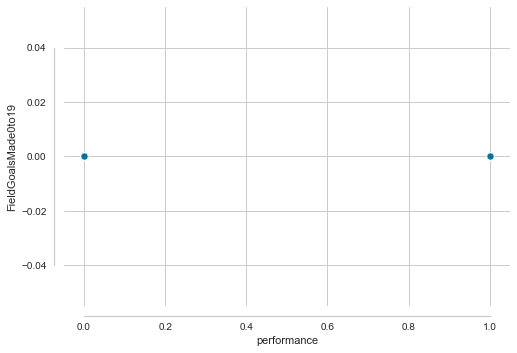

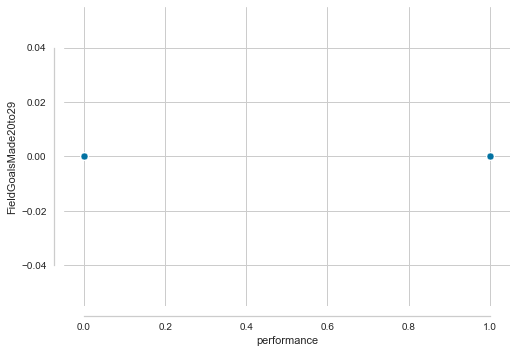

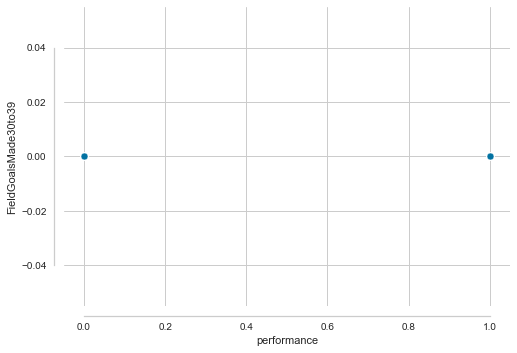

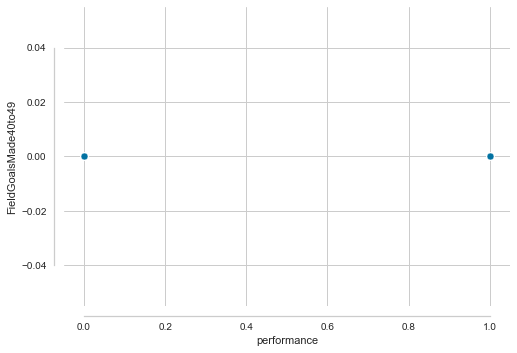

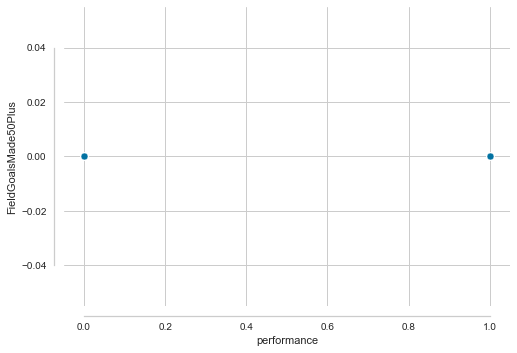

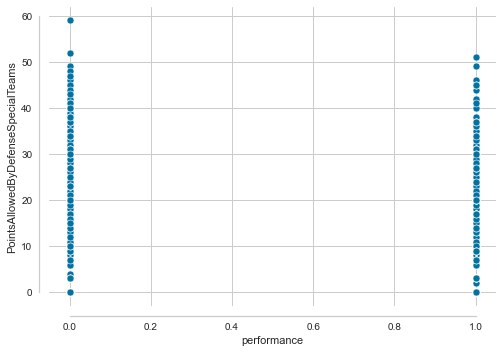

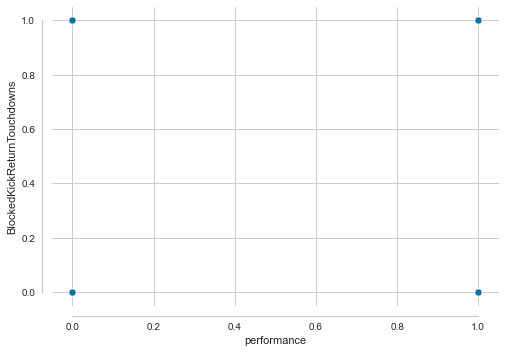

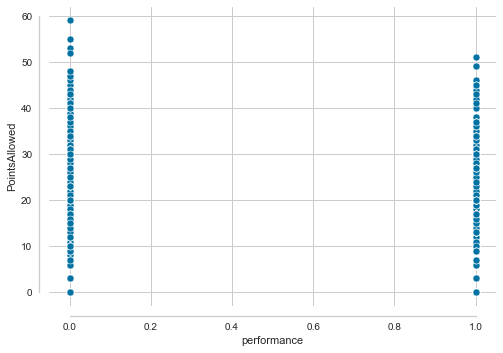

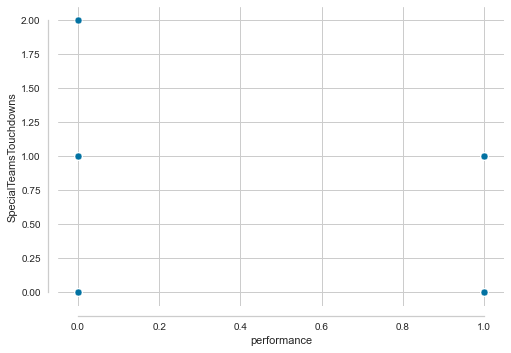

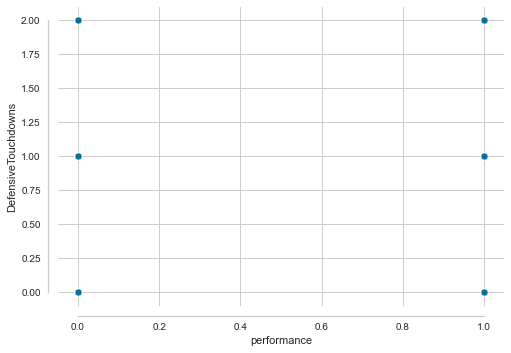

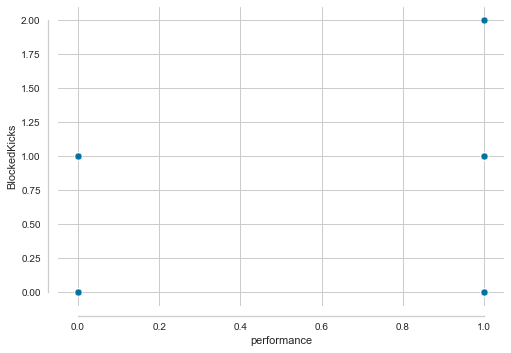

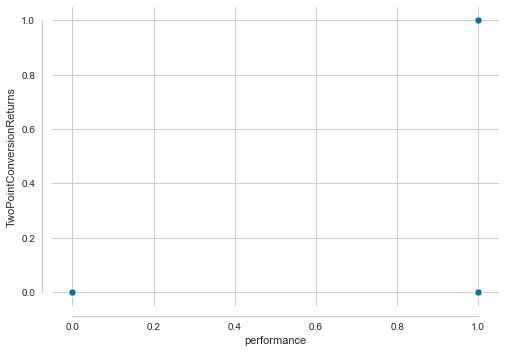

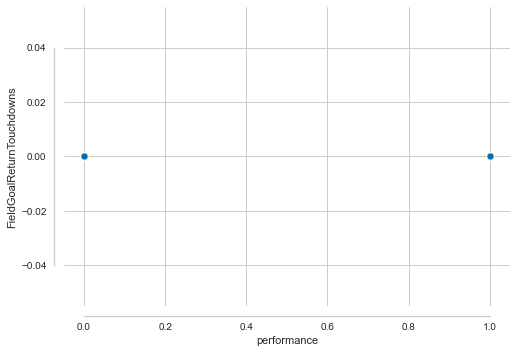

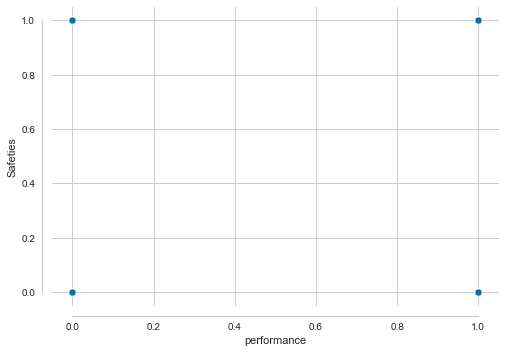

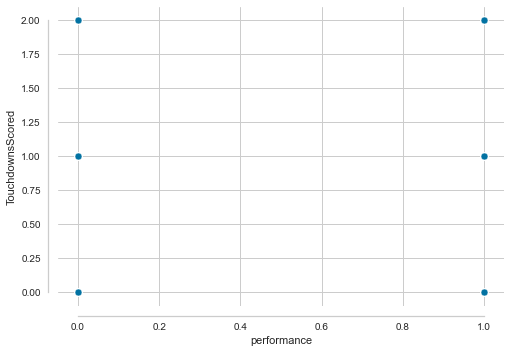

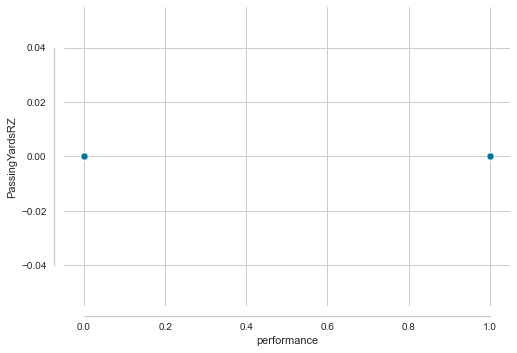

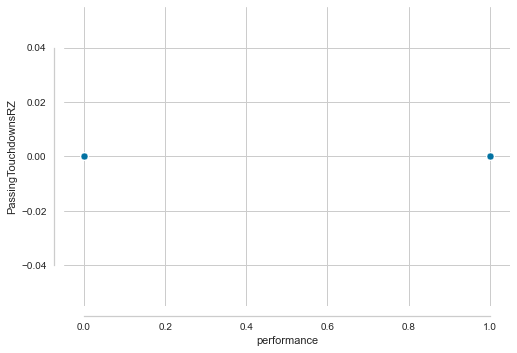

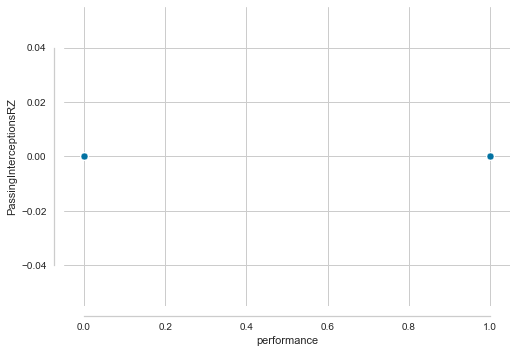

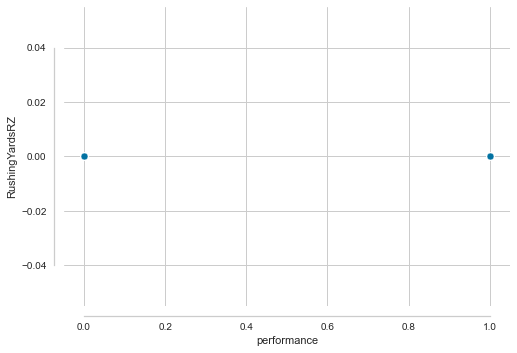

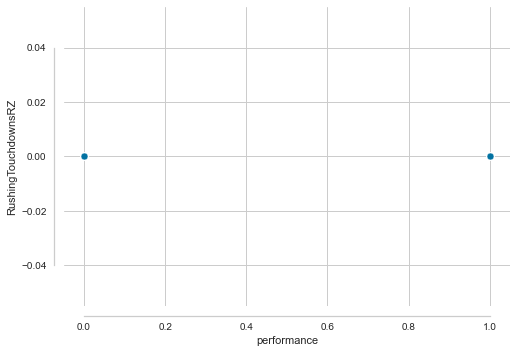

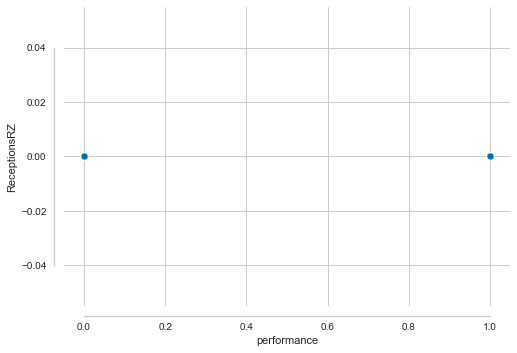

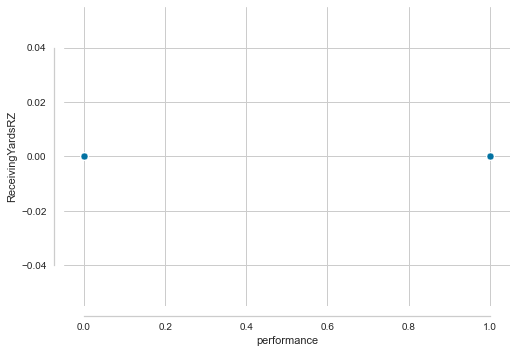

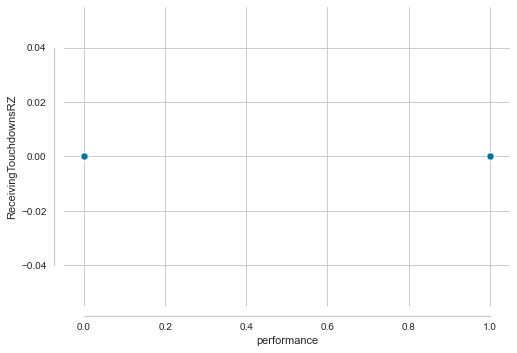

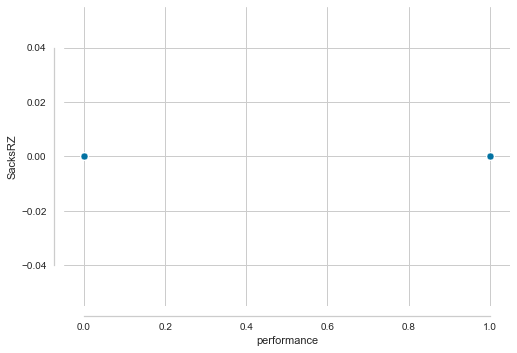

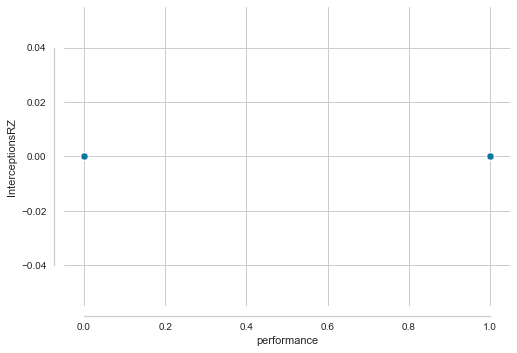

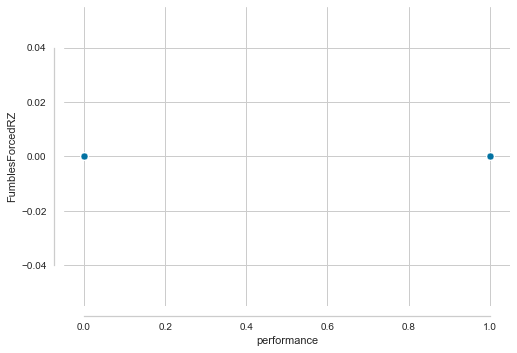

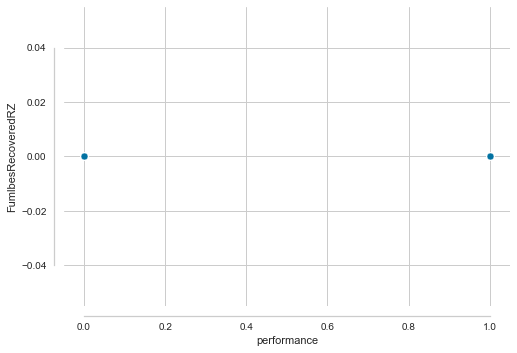

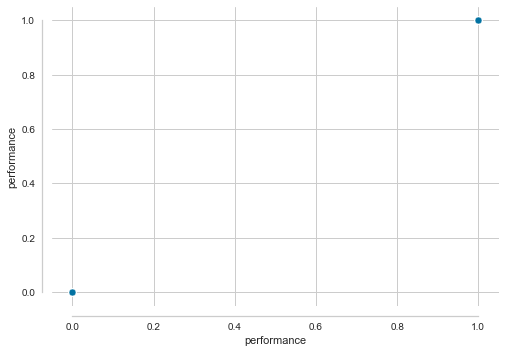

In [523]:
for col in df[boxplot_cols].columns[2:len(df[boxplot_cols].columns)]:
    
    sns.scatterplot(x = 'performance', y = col, palette=['b','r'], data=df)
    sns.despine(offset=10, trim=True)

    plt.show()
    plt.clf()

plt.close()

<h3>Drop non-defensive, RedZone stats</h3>

In [314]:
df.drop(['OpponentRZ',
         'PassingAttempts',
         'PassingCompletions',
         'PassingYards',
         'PassingCompletionPercentage',
         'PassingYardsPerAttempt',
         'PassingYardsPerCompletion',
         'PassingTouchdowns',
         'PassingInterceptions',
         'PassingRating',
         'PassingLong',
         'PassingSacks',
         'PassingSackYards',
         'RushingAttempts',
         'RushingYards',
         'RushingYardsPerAttempt',
         'RushingTouchdowns',
         'RushingLong',
         'ReceivingTargets',
         'Receptions',
         'ReceivingYards',
         'ReceivingYardsPerReception',
         'ReceivingTouchdowns',
         'ReceivingLong',
         'Fumbles',
         'FumblesLost', 
         'FieldGoalsAttempted',
         'FieldGoalsMade',
         'ExtraPointsMade',
         'TwoPointConversionPasses',
         'TwoPointConversionRuns',
         'TwoPointConversionReceptions',
         'ExtraPointsAttempted',
         'FieldGoalsMade0to19',
         'FieldGoalsMade20to29',
         'FieldGoalsMade30to39',
         'FieldGoalsMade40to49',
         'FieldGoalsMade50Plus',         
         'FieldGoalReturnTouchdowns',
         'PassingYardsRZ',
         'PassingTouchdownsRZ',
         'PassingInterceptionsRZ',
         'RushingYardsRZ',
         'RushingTouchdownsRZ',
         'ReceptionsRZ',
         'ReceivingYardsRZ',
         'ReceivingTouchdownsRZ',
         'FumlbesRecoveredRZ',
         'SacksRZ',
         'InterceptionsRZ',
         'FumblesForcedRZ',
         'Played',
         'Started',
         'PassesDefended',
         'PuntReturnYards',
        'PuntReturnTouchdowns',
        'KickReturns',
         'KickReturnTouchdowns',
          'TwoPointConversionReturns',
        'KickReturnYards',
        'AssistedTackles',
        'PuntReturns'
        ], axis=1, inplace = True)
df

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GameKey,PlayerID,Season,Week,Team,Opponent,HomeOrAway,Position,PositionCategory,InjuryStatus,...,InterceptionReturnTouchdowns,PointsAllowedByDefenseSpecialTeams,BlockedKickReturnTouchdowns,PointsAllowed,SpecialTeamsTouchdowns,DefensiveTouchdowns,BlockedKicks,Safeties,TouchdownsScored,performance
0,201910101,1,2019,1,ARZ,DET,HOME,DEF,DEF,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0
1,201910203,1,2019,2,ARZ,BLT,AWAY,DEF,DEF,0,...,0.0,27.0,0.0,27.0,0,0.0,0.0,0.0,0.0,0.0
2,201910301,1,2019,3,ARZ,CAR,HOME,DEF,DEF,0,...,0.0,23.0,0.0,23.0,0,0.0,0.0,0.0,0.0,0.0
3,201910401,1,2019,4,ARZ,SEA,HOME,DEF,DEF,0,...,0.0,38.0,0.0,38.0,0,0.0,0.0,0.0,0.0,0.0
4,201910507,1,2019,5,ARZ,CIN,AWAY,DEF,DEF,0,...,0.0,21.0,0.0,27.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,202011328,97,2020,13,WAS,PIT,AWAY,DEF,DEF,0,...,1.0,16.0,0.0,16.0,0,1.0,0.0,0.0,1.0,0.0
9979,202011431,97,2020,14,WAS,SF,AWAY,DEF,DEF,0,...,0.0,17.0,0.0,17.0,0,0.0,0.0,0.0,0.0,1.0
9980,202011535,97,2020,15,WAS,SEA,HOME,DEF,DEF,0,...,1.0,15.0,0.0,15.0,0,2.0,0.0,0.0,2.0,0.0
9981,202011635,97,2020,16,WAS,CAR,HOME,DEF,DEF,0,...,0.0,20.0,0.0,20.0,0,0.0,0.0,0.0,0.0,1.0


In [9]:
df = df.drop('Season', axis = 'columns').sort_values(by = ['Week']).reset_index(drop = True)

In [10]:
list(df)

['GameKey',
 'PlayerID',
 'Week',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Position',
 'PositionCategory',
 'InjuryStatus',
 'TeamID',
 'OpponentID',
 'ScoreID',
 'week_id',
 'OpponentRZ',
 'days_since_last_game',
 'absolute_hours_displaced',
 'weather_temperature',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation',
 'weather_humidity',
 'weather_detail',
 'elevation_displacement',
 'age',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'Punt

<AxesSubplot:>

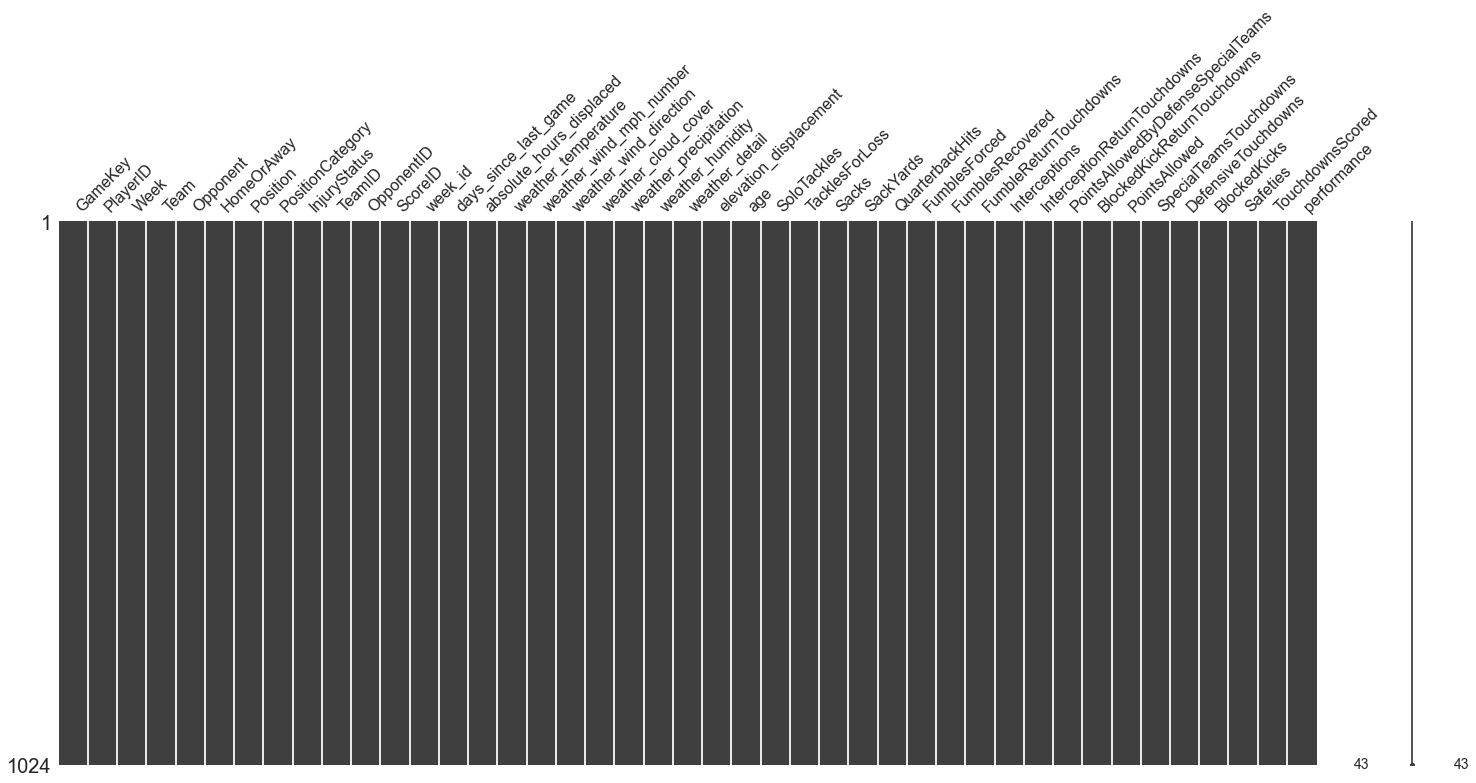

In [317]:
#check for nan
msno.matrix(df)

<h3>Split dataframe into two dataframes: X will have all but target, y will have target</h3>


In [11]:
X = df.drop(['performance',
             'TeamID',
             'OpponentID',
             'ScoreID',
             'GameKey',
             'performance',
             'PlayerID',
             'week_id'
            ], axis = 'columns')

y = df['performance']

In [12]:
target = df['performance']

In [13]:
X

,Week,Team,Opponent,HomeOrAway,Position,PositionCategory,InjuryStatus,OpponentRZ,days_since_last_game,absolute_hours_displaced,...,PassingInterceptionsRZ,RushingYardsRZ,RushingTouchdownsRZ,ReceptionsRZ,ReceivingYardsRZ,ReceivingTouchdownsRZ,SacksRZ,InterceptionsRZ,FumblesForcedRZ,FumlbesRecoveredRZ
0,1,ARZ,DET,HOME,DEF,DEF,0,0,365,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,LV,DEN,HOME,DEF,DEF,0,0,365,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,LAC,IND,HOME,DEF,DEF,0,0,365,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,SEA,CIN,HOME,DEF,DEF,0,0,365,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,SF,TB,AWAY,DEF,DEF,0,0,365,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,17,ATL,TB,AWAY,DEF,DEF,0,0,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,17,ARZ,LAR,AWAY,DEF,DEF,0,0,8,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,17,TB,ATL,HOME,DEF,DEF,0,0,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,17,LAC,KC,AWAY,DEF,DEF,0,0,7,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1019    0.0
1020    1.0
1021    1.0
1022    0.0
1023    1.0
Name: performance, Length: 1024, dtype: float64

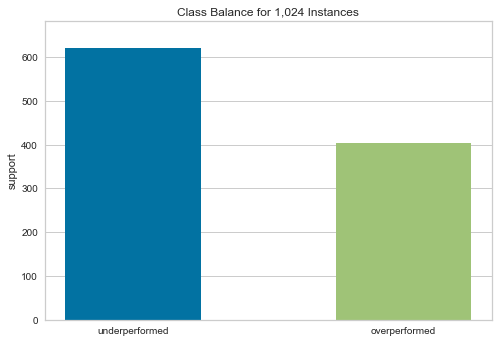

In [15]:
#examine class balance
visualizer = ClassBalance(labels=['underperformed','overperformed'])

visualizer.fit(target) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [16]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(819, 98) (819,)
(205, 98) (205,)


In [17]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

<h3>Feed data into models</h3>

In [18]:
# list of models to use

models = [
    SVC(gamma='auto'), 
    NuSVC(gamma='auto'), 
    LinearSVC(),
    SGDClassifier(max_iter=1000, tol=1e-3), 
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs',max_iter=1000), 
    LogisticRegressionCV(cv=3),
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]

In [19]:
# function to score models
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    
    # handle_unknown='ignore' in OneHotEncoder() is used because weather_detail data gave it trouble
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', MinMaxScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
    ])

    #add train/test split
    y_train = y[:X.index[X['Week'] > 14].tolist()[0]]
    y_test = y[X.index[X['Week'] > 14].tolist()[0]:]
    X_train = X[:X.index[X['Week'] > 14].tolist()[0]].drop('Week', axis = 'columns')
    X_test = X[X.index[X['Week'] > 14].tolist()[0]:].drop('Week', axis = 'columns')
    
    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs) #updated to train with train set
    expected  = y_test #updated with test set
    predicted = model.predict(X_test)  #updated with test set
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
                                   


In [20]:
def visualize_model(X, y, estimator, **kwargs):
    """
    Visualizes models
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', MinMaxScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
    ])
    
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Underperformed', 'Overperformed'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    #add train/test split
    #X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
    
    #add train/test split
    y_train = y[:X.index[X['Week'] > 14].tolist()[0]]
    y_test = y[X.index[X['Week'] > 14].tolist()[0]:]
    X_train = X[:X.index[X['Week'] > 14].tolist()[0]].drop('Week', axis = 'columns')
    X_test = X[X.index[X['Week'] > 14].tolist()[0]:].drop('Week', axis = 'columns')
    
    visualizer.fit(X_train, y_train) #updated with train set
    visualizer.score(X_test, y_test) #updated with test set
    visualizer.show()

In [328]:
X['Position'].unique()

array(['DEF'], dtype=object)

F1 SCORE SVC: 0.0


C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


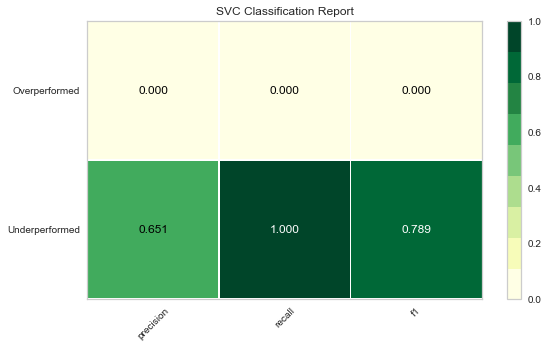

F1 SCORE NuSVC: 0.3283582089552239


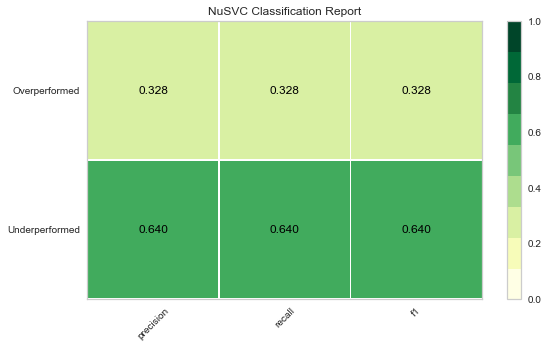

F1 SCORE LinearSVC: 0.3076923076923077


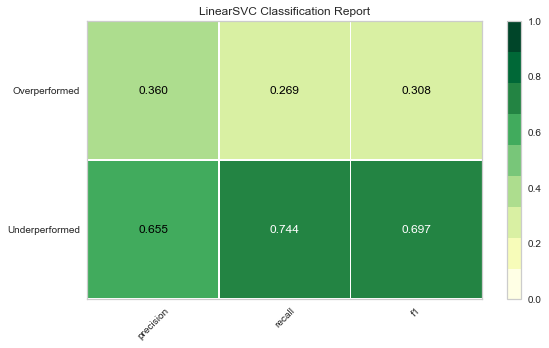

F1 SCORE SGDClassifier: 0.28070175438596495


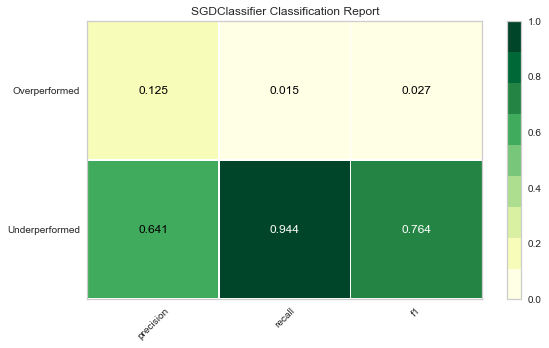

F1 SCORE KNeighborsClassifier: 0.28571428571428575


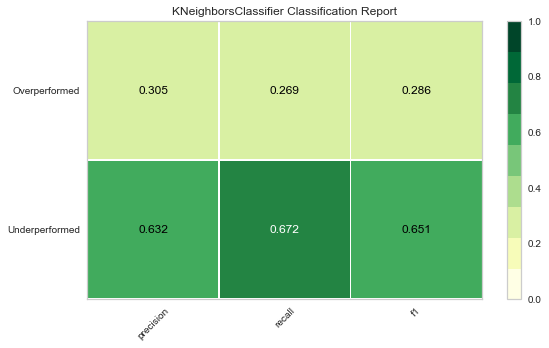

F1 SCORE LogisticRegression: 0.27586206896551724


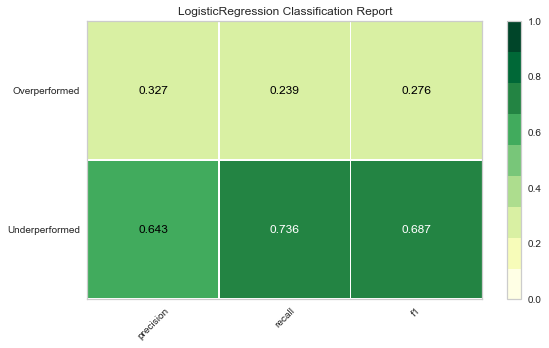

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

F1 SCORE LogisticRegressionCV: 0.0


C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

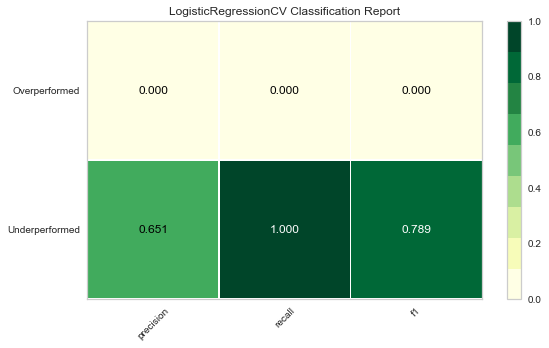

F1 SCORE BaggingClassifier: 0.23728813559322032


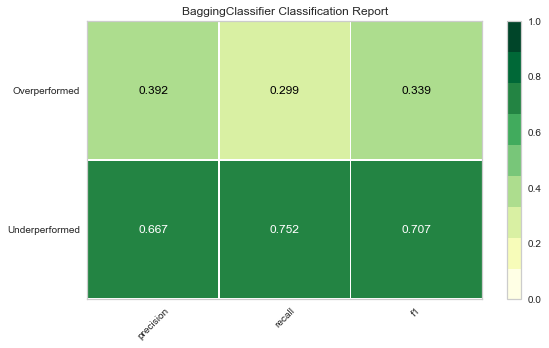

F1 SCORE ExtraTreesClassifier: 0.2782608695652174


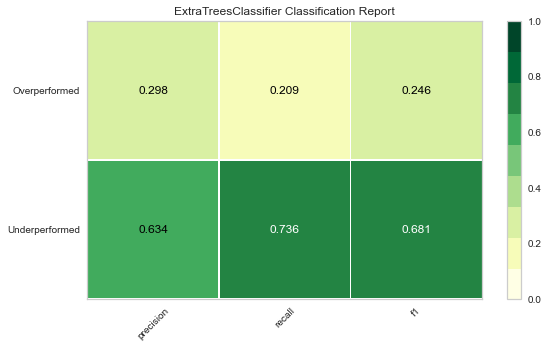

F1 SCORE RandomForestClassifier: 0.22448979591836735


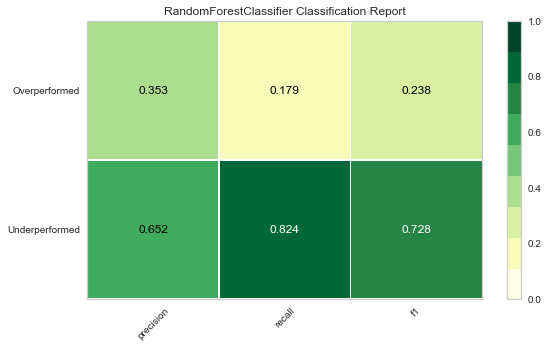

In [329]:
for model in models:
    score_model(X, y, model)
    visualize_model(X, y, model)

<h3> Adjusting model parameters</h3>

In [330]:
models = [
    SVC(gamma='scale'), 
    NuSVC(gamma='scale'), 
    LinearSVC(loss='hinge'),
    SGDClassifier(max_iter=200, tol=1e-3), 
    KNeighborsClassifier(n_neighbors = 5,  p=2),
    LogisticRegression(solver='lbfgs',max_iter=2000), 
    LogisticRegressionCV(cv=5),
    BaggingClassifier(n_estimators=100), 
    ExtraTreesClassifier(n_estimators=500),
    RandomForestClassifier(n_estimators=500)
]

F1 SCORE SVC: 0.07228915662650602


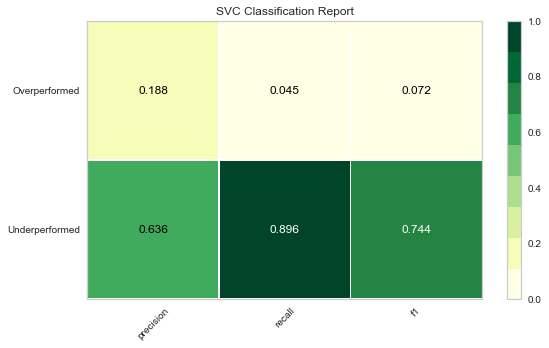

F1 SCORE NuSVC: 0.30769230769230765


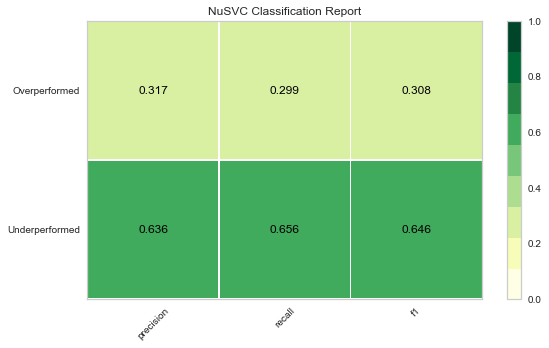

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 SCORE LinearSVC: 0.198019801980198


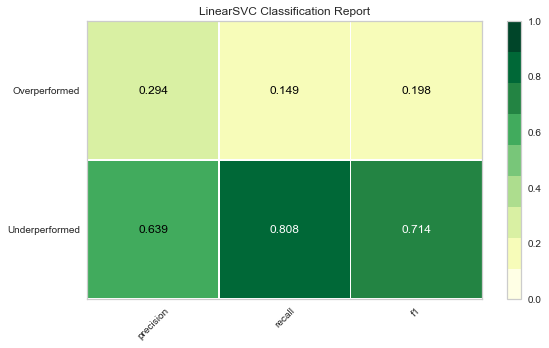

F1 SCORE SGDClassifier: 0.373134328358209


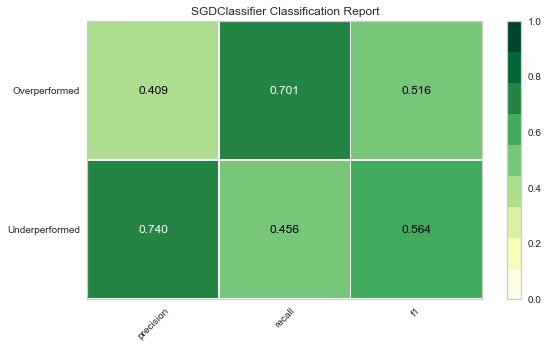

F1 SCORE KNeighborsClassifier: 0.28571428571428575


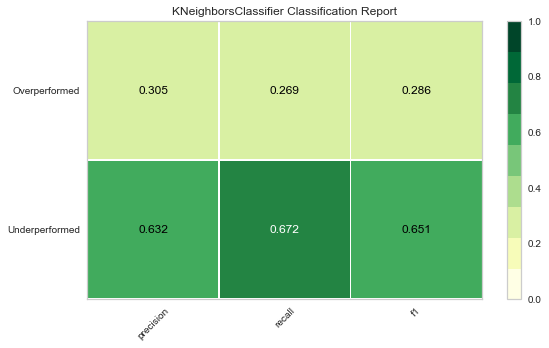

F1 SCORE LogisticRegression: 0.27586206896551724


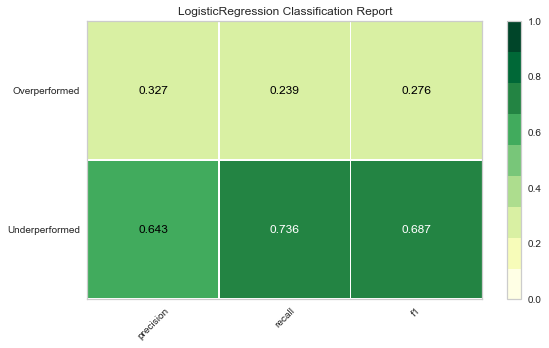

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

F1 SCORE LogisticRegressionCV: 0.0


C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

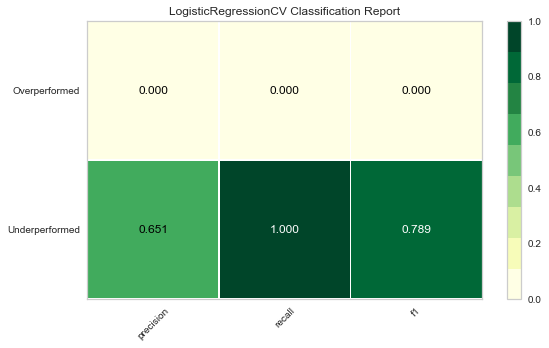

F1 SCORE BaggingClassifier: 0.2689075630252101


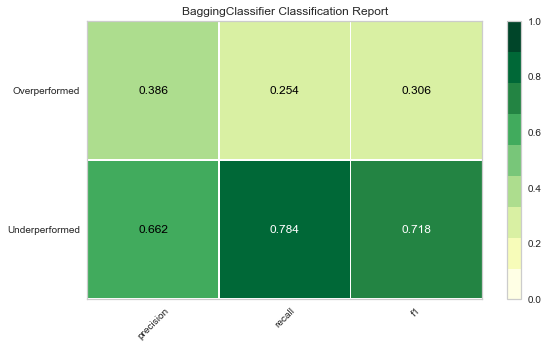

F1 SCORE ExtraTreesClassifier: 0.23423423423423423


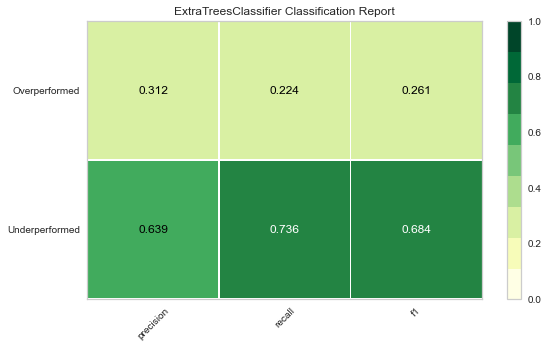

F1 SCORE RandomForestClassifier: 0.16


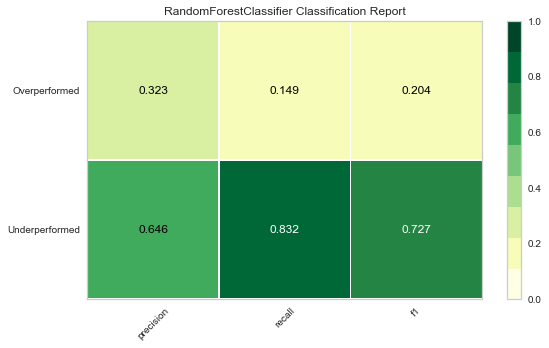

In [331]:
for model in models:
    score_model(X, y, model)
    visualize_model(X, y, model)

<strong>SGD Classifier</strong> saw an 0.1% increase in precision!

<strong>Top 3 models for precision: </strong>
    <ul>
        <li>SGD Classifer (0.74)</li>
        <li>BaggingClassifer (0.662) </li>
        <li>Logistic Regression (0.643)</i></ul>
       

<h3>Further examination/tweaking of top model parameters</h3>

<i>Let's improve the scores for Logistic Regression and Bagging Classifier</i>

In [598]:
good_models = [
    ## logreg: 0.643
    LogisticRegression(
        solver='lbfgs',
        penalty = 'l2',  
        class_weight = 'balanced',
        C = 1.2
    
    ),
    # Bagging = 0.662
       BaggingClassifier(
       n_estimators= 20,
        max_features = 1,
        max_samples = 1.0)]
        

F1 SCORE LogisticRegression: 0.4202898550724637


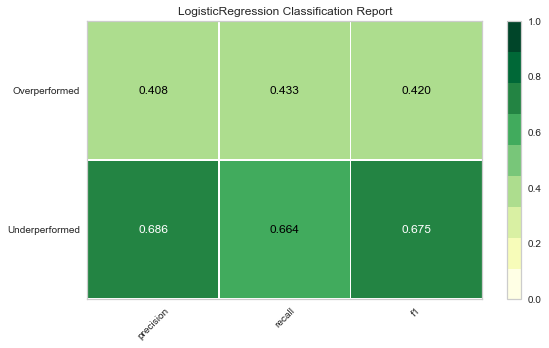

F1 SCORE BaggingClassifier: 0.0


C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


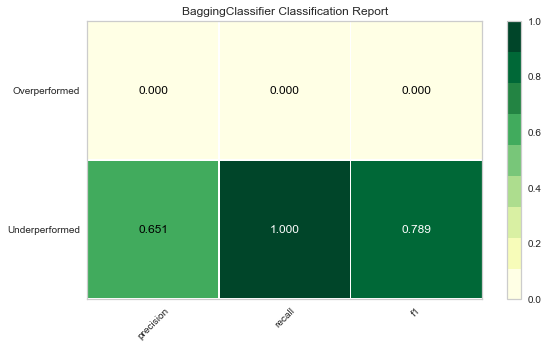

In [599]:
for model in good_models:
    score_model(X, y, model)
    visualize_model(X, y, model)

<i>Some slight precision score improvements for <strong>Logisitc Regression (+0.04%)</strong>. I'll see if the GridSearch will help improve the BaggingClassifier score.

<H3>Grid Search</h3>

<strong>Logistic Regression</strong>

In [21]:
preprocessor = Pipeline(
    [
        ("columns", ColumnTransformer(
            [
                ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical),
                ('scalar', MinMaxScaler(), numeric),
                ('scalar2', MinMaxScaler(), numeric2),
            ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [356]:
y_train = y[:X.index[X['Week'] > 14].tolist()[0]]
y_test = y[X.index[X['Week'] > 14].tolist()[0]:]
X_train = X[:X.index[X['Week'] > 14].tolist()[0]].drop('Week', axis = 'columns')
X_test = X[X.index[X['Week'] > 14].tolist()[0]:].drop('Week', axis = 'columns')

In [357]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [358]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [359]:
param_grid_log = {'C': [1.0,1.5,1.2],
             'max_iter':[500,1000,2000],
             'class_weight':['balanced',None],
             'solver':['lbfgs','liblinear']}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_log, cv = 5)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 1.2],
                         'class_weight': ['balanced', None],
                         'max_iter': [500, 1000, 2000],
                         'solver': ['lbfgs', 'liblinear']})

In [360]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 1.2],
                         'class_weight': ['balanced', None],
                         'max_iter': [500, 1000, 2000],
                         'solver': ['lbfgs', 'liblinear']})

In [361]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 1.0, 'class_weight': None, 'max_iter': 500, 'solver': 'lbfgs'}
Best score is 0.5481783421109588


<strong>Bagging Classifier</strong>

In [362]:
# Creating the hyperparameter grid

param_grid_bag = {'n_estimators':[10,15,20],
              'max_samples':[1.0,2.0],
              'max_features':[1.0,2.0],
              'n_jobs':[1,-1]
             }
# Instantiating logistic regression classifier
bag = BaggingClassifier()
# Instantiating the GridSearchCV object
bag_cv = GridSearchCV(bag, param_grid_bag, cv = 5)
bag_cv.fit(X_train, y_train)
bag_cv.fit(X_train,y_train)

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\model_selection\_valid

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [1.0, 2.0], 'max_samples': [1.0, 2.0],
                         'n_estimators': [10, 15, 20], 'n_jobs': [1, -1]})

In [363]:
# Print the tuned parameters and score
print("Tuned Bagging Classifier Parameters: {}".format(bag_cv.best_params_))
print("Best score is {}".format(bag_cv.best_score_)) 

Tuned Bagging Classifier Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'n_jobs': -1}
Best score is 0.5650025250703412


<strong>SGD Classifier</strong>

In [385]:
# Creating the hyperparameter grid

param_grid_sgd = {'loss':['hinge','log','squared_hinge'],
              'max_iter':[200,500,1000],
              'class_weight':['balanced',None],
              'alpha':[0.0001,0.001]
             }
# Instantiating logistic regression classifier
sgd_cv = SGDClassifier()
# Instantiating the GridSearchCV object
sgd_cv = GridSearchCV(sgd_cv, param_grid_sgd, cv = 5)
sgd_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned SGDClassifier Parameters: {}".format(sgd_cv.best_params_))
print("Best score is {}".format(sgd_cv.best_score_)) 

C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Yaphet Tewahade\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum

Tuned SGDClassifier Parameters: {'alpha': 0.0001, 'class_weight': None, 'loss': 'log', 'max_iter': 200}
Best score is 0.5649953105836519


<h3>Let's score our models using the tuned parameters</h3>
<ul>
    <li><strong>LogisticRegression</strong>
    <ul>
        <li><i>Tuned parameters</i>:  {'C': 1.0, 'class_weight': None, 'max_iter': 500, 'solver': 'lbfgs'}</li></ul></li>
    <li><strong>SGDClassifier</strong>
        <ul>
            <li><i>Tuned parameters</i>: {'alpha': 0.001, 'class_weight': None, 'loss': 'log', 'max_iter': 200}</li></ul></li>
    <li><strong>Bagging Classifier</strong>
        <ul>
            <li><i>Tuned parameters</i>: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'n_jobs': -1}</li></ul></li></ul>

In [365]:
preprocessor = Pipeline(
    [
        ("columns", ColumnTransformer(
            [
                ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical),
                ('scalar', MinMaxScaler(), numeric),
                ('scalar2', MinMaxScaler(), numeric2),
            ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [366]:
y_train = y[:X.index[X['Week'] > 14].tolist()[0]]
y_test = y[X.index[X['Week'] > 14].tolist()[0]:]
X_train = X[:X.index[X['Week'] > 14].tolist()[0]].drop('Week', axis = 'columns')
X_test = X[X.index[X['Week'] > 14].tolist()[0]:].drop('Week', axis = 'columns')

In [367]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [368]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_train)

<h3>Logistic Regression after GridSearch</h3>
<i>Prev. precision score: 0.648</i>

F1 SCORE LogisticRegression: 0.41726618705035967


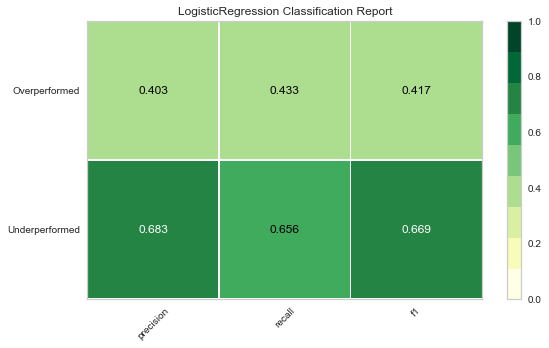

In [370]:
score_model(X, y, LogisticRegression(
    C = 1,
    class_weight = 'balanced',
    max_iter = 200,
    solver = 'lbfgs'
))    

visualize_model(X, y, LogisticRegression(
    C = 1,
    class_weight = 'balanced',
    max_iter = 200,
    solver = 'lbfgs'
))

<h3>A 0.04-point increase in precision for Logistic Regression! </h3>

<h3>SGDClassifier after GridSearch</h3>
<i>Prev. precision score: 0.74</i>

F1 SCORE SGDClassifier: 0.44578313253012053


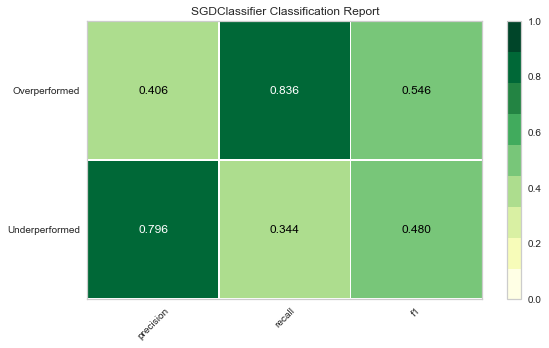

In [584]:
score_model(X, y, SGDClassifier(
    alpha = 0.0001,
    class_weight = None,
    loss = 'log',
    max_iter = 200
))    

visualize_model(X, y, SGDClassifier(
    alpha = 0.0001,
    class_weight = None,
    loss = 'log',
    max_iter = 200,
))

<h3> A 0.05-point increase in precision for SGD Classifier!</h3>

<h3>Bagging Classifier after GridSearch</h3>
<i>Prev. precision score 0.662</i>

F1 SCORE BaggingClassifier: 0.24778761061946908


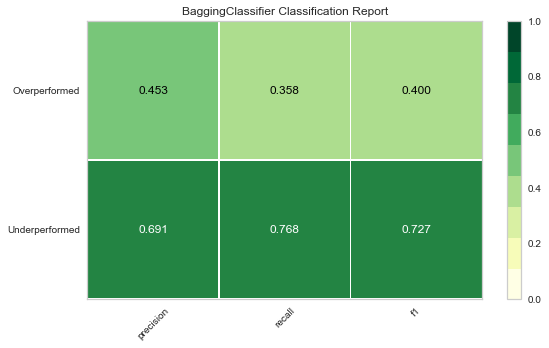

In [476]:
score_model(X, y, BaggingClassifier(
    max_features = 1.0,
    max_samples = 1.0,
    n_estimators = 10,
    n_jobs = -1
))    

visualize_model(X, y, BaggingClassifier(
    max_features = 1.0,
    max_samples = 1.0,
    n_estimators = 10,
    n_jobs = -1
))

<h3>A 0.03-point increase in precision for BaggingClassifier! </h3>

<h3>Confusion Matrix for SGD Classifier</he>

In [22]:
y_train = y[:X.index[X['Week'] > 14].tolist()[0]]
y_test = y[X.index[X['Week'] > 14].tolist()[0]:]
X_train = X[:X.index[X['Week'] > 14].tolist()[0]].drop('Week', axis = 'columns')
X_test = X[X.index[X['Week'] > 14].tolist()[0]:].drop('Week', axis = 'columns')
preprocessor = Pipeline(
    [
        ("columns", ColumnTransformer(
            [
                ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical),
                ('scalar', MinMaxScaler(), numeric),
                ('scalar2', MinMaxScaler(), numeric2),
            ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

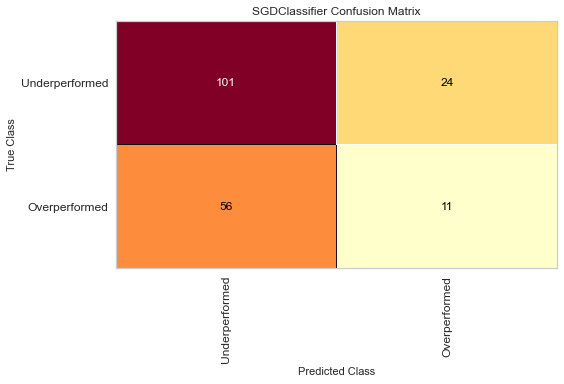

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [604]:
from yellowbrick.classifier import ConfusionMatrix

model = SGDClassifier(
    alpha = 0.001,
    class_weight = None,
    loss = 'log',
    max_iter = 200
)
cm = ConfusionMatrix(
    model,
    classes = ['Underperformed', 'Overperformed']
)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [24]:
X_cv = preprocessor.fit_transform(X)
y_cv = LabelEncoder().fit_transform(y)


In [26]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
for n in range(1,18):
    print(f'Cross-validating fold {n}')
    # prepare the cross-validation procedure
    cv = KFold(
        n_splits = n+1,
        random_state = 123,
        shuffle = True
    )
    # create model
    model = SGDClassifier(
       alpha = 0.001,
        class_weight = None,
        loss = 'log',
        max_iter = 200
    )
    # evaluate model
    scores = cross_val_score(
        model,
        X_cv[:(X[X['Week'] <= n].index.to_list()[-1] + 1)],
        y_cv[:(X[X['Week'] <= n].index.to_list()[-1] + 1)],
        scoring = 'accuracy',
        cv = cv,
        n_jobs = -1
    )
    # report performance
    means = []
    means.append(mean(scores))
    print(
        f'Accuracy: Mean: {mean(scores)}, stdev: {std(scores)}'
        '\n'
    )
print(f'Mean of mean scores: {sum(means) / len(means)}')

Cross-validating fold 1
Accuracy: Mean: 0.59375, stdev: 0.0625

Cross-validating fold 2
Accuracy: Mean: 0.4688076781100037, stdev: 0.0383337171967432

Cross-validating fold 3
Accuracy: Mean: 0.5364583333333334, stdev: 0.10139542882256136

Cross-validating fold 4
Accuracy: Mean: 0.5597647058823529, stdev: 0.06534025338207554

Cross-validating fold 5
Accuracy: Mean: 0.5615887380593264, stdev: 0.06212787693829884

Cross-validating fold 6
Accuracy: Mean: 0.5549968899025503, stdev: 0.08720183668474138

Cross-validating fold 7
Accuracy: Mean: 0.5166908563134978, stdev: 0.07660149253782772

Cross-validating fold 8
Accuracy: Mean: 0.5356782358878794, stdev: 0.04865253220928719

Cross-validating fold 9
Accuracy: Mean: 0.5691474493361286, stdev: 0.03109456329319587

Cross-validating fold 10
Accuracy: Mean: 0.5339241471316943, stdev: 0.08804268248036104

Cross-validating fold 11
Accuracy: Mean: 0.5308059631959002, stdev: 0.06630661214371165

Cross-validating fold 12
Accuracy: Mean: 0.546749546749

<h3>Pickling model for future use</h3>

In [27]:
import pickle


In [28]:
filename = '../../../foo/defense_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [531]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.578125
